# TOP 3 LEAGUES OF EUROPE

# Premier League (2016-2019)
- In this project I will be using data from 2014-19 of the epl which will have data of every match played in the premeier league during this period. I have collected the data from https://sports-statistics.com/sports-data/ .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Merging the file of 5 years
- I am going to use 5 csv files each conatining all the matches of a single season, so we have concatinated all 5 files in a single dataframe for easier data manipulation

In [2]:
a = pd.read_csv('Data/epl_season-1819_csv.csv')
b = pd.read_csv('Data/epl_season-1718_csv.csv')
c = pd.read_csv('Data/epl_season-1617_csv.csv')
e = pd.read_csv('Data/epl_season-1516_csv.csv')
f = pd.read_csv('Data/epl_season-1415_csv.csv')
d = pd.concat([a,b,c,e,f])
df_epl = pd.DataFrame(d)
df_epl.describe()
#As we can see there is no data missing from the tables

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.532632,1.180526,0.678947,0.523158,14.133684,11.227895,4.714211,3.822105,10.547368,11.070000,5.820526,4.675263,1.565263,1.750526,0.056316,0.078947,2.953426,4.233642,5.103942
std,1.296282,1.161766,0.838187,0.741453,5.711976,4.727449,2.656756,2.241110,3.396304,3.508636,3.109025,2.660403,1.231265,1.276380,0.239552,0.275522,2.292338,1.429377,4.586530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,3.000000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.670000,3.400000,2.397500
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,4.000000,4.000000,10.000000,11.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.250000,3.700000,3.500000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.200000,4.500000,5.750000
max,8.000000,7.000000,5.000000,4.000000,43.000000,30.000000,17.000000,15.000000,24.000000,26.000000,19.000000,15.000000,7.000000,9.000000,2.000000,2.000000,23.000000,17.000000,41.000000


- We have to sort the dataframe with respect to the dates of the matches played

In [3]:
#sorting the data by date and deleting unwanted columns
df_epl['Date'] = pd.to_datetime(df_epl['Date'],format = '%d-%m-%Y')
df_epl.sort_values(by = ['Date'],inplace = True) #sorting the dataset by date
df_epl.reset_index(drop=True,inplace = True)
df_epl.drop(['Div','B365H','B365D','B365A'],axis = 1,inplace = True) #dropping the div column as it is understood it is div1 and also the betting values
df_epl

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,6,2,13,19,9,3,2,2,0,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,3,16,10,3,6,1,1,0,0
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,5,4,14,20,4,0,2,4,0,0
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,6,4,10,10,8,9,1,2,0,0
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,2,14,9,2,8,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-12,Leicester,Chelsea,0,0,D,0,0,D,A Taylor,...,3,4,9,8,4,5,0,1,0,0
1896,2019-05-12,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,...,5,2,3,11,4,1,0,2,0,0
1897,2019-05-12,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,10,4,9,6,11,2,3,3,0,0
1898,2019-05-12,Watford,West Ham,1,4,A,0,2,A,C Kavanagh,...,8,9,10,10,7,2,1,0,1,0


In [4]:
df_epl.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object

### Renaming the columns

- As there is no column which mentions the season in which the match is played, we have to specify the season for each match


In [5]:
df_epl.columns = ['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','refree','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']
df_epl['season'] = (df_epl.index // 380) + 1
df_epl.head()

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,refree,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,2,13,19,9,3,2,2,0,1,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,16,10,3,6,1,1,0,0,1
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,4,14,20,4,0,2,4,0,0,1
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,4,10,10,8,9,1,2,0,0,1
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,14,9,2,8,0,3,0,0,1


#### name of teams played

In [6]:
#To get the names which during these 5  seasons
print('Total teams played in these 5 years: ',df_epl['awayteam'].nunique())
print('\nNames of those teams are:',df_epl['awayteam'].unique())

Total teams played in these 5 years:  29

Names of those teams are: ['Crystal Palace' 'Everton' 'Swansea' 'Hull' 'Aston Villa' 'Sunderland'
 'Tottenham' 'Man City' 'Southampton' 'Chelsea' 'West Ham' 'Newcastle'
 'Burnley' 'Leicester' 'Arsenal' 'West Brom' 'Stoke' 'Man United' 'QPR'
 'Liverpool' 'Watford' 'Norwich' 'Bournemouth' 'Middlesbrough'
 'Huddersfield' 'Brighton' 'Cardiff' 'Fulham' 'Wolves']


#### Number of matches played by each team

In [7]:
#we are going to calculate the number of each team played an then plot it.
number_of_games_epl = df_epl['hometeam'].value_counts() + df_epl['awayteam'].value_counts()
team_games_epl = pd.DataFrame(number_of_games_epl).sort_index(axis = 0) 
team_games_epl.columns = ['Total games']
team_games_epl

,Total games
Arsenal,190
Aston Villa,76
Bournemouth,152
Brighton,76
Burnley,152
Cardiff,38
Chelsea,190
Crystal Palace,190
Everton,190
Fulham,38


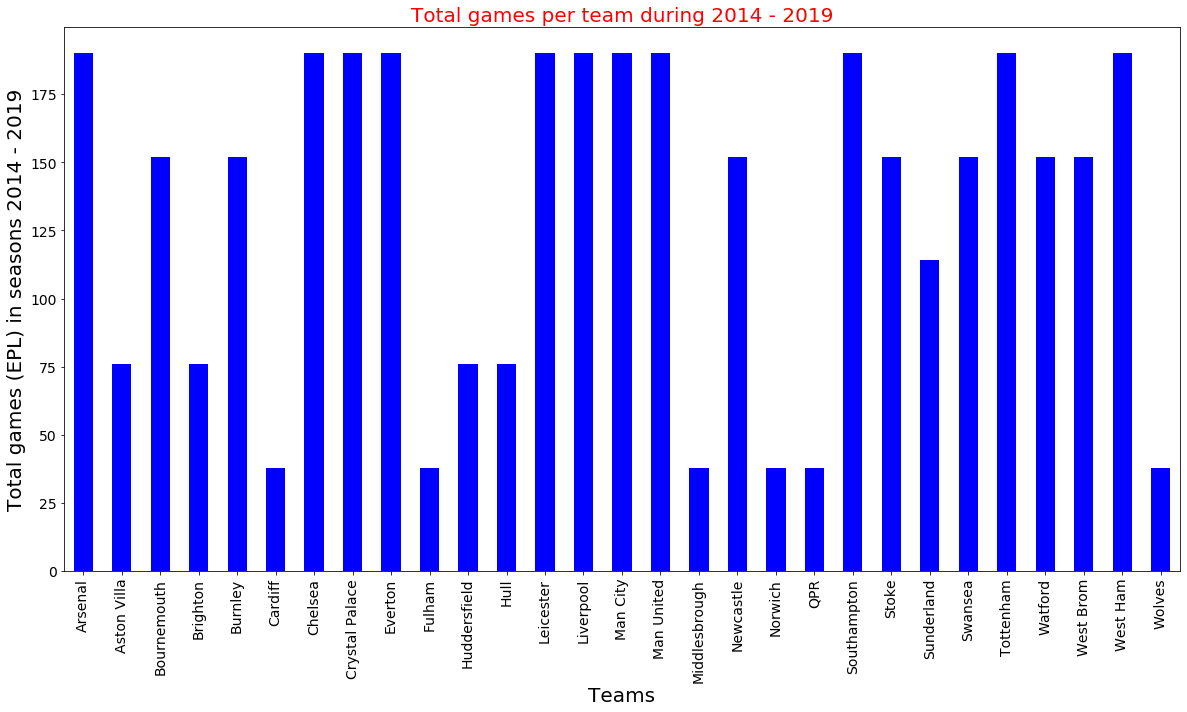

In [8]:
team_games_epl.plot(kind='bar',color='blue', legend=False, figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Total games (EPL) in seasons 2014 - 2019',fontsize=20)
plt.title('Total games per team during 2014 - 2019',fontsize=20, color='red')
plt.show()

Here, we can see 11 teams have played all the 5 seasons without getting relegated

### Results for home and away matches

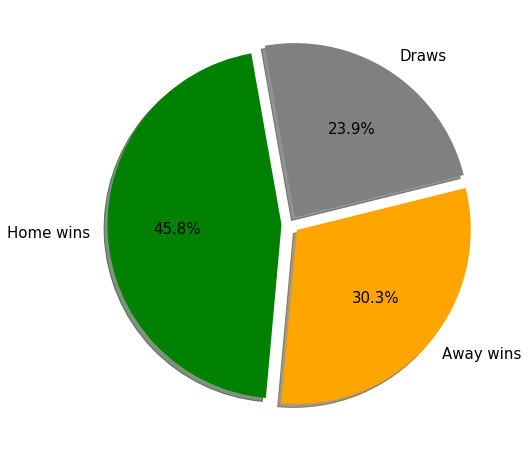

In [9]:
results = pd.DataFrame(df_epl['fulltime_results'].value_counts())
fig = plt.figure(figsize = (8,8))
plt.pie(results,autopct = '%1.1f%%',startangle = 100,labels = ['Home wins','Away wins','Draws'],shadow = True,explode = (0.05,0.05,0.05),colors = ('green','orange','grey'),textprops = {'fontsize':15})
plt.show()

This shows the home advantage which teams get in the epl. We can see only 23.9% of the matches have ended in a draw which is low compared to other leagues in europe

### Points Table with some stats

- We will create a ponts table for the last 5 seasons and see which teams have performed better and worst, we will also which stats has helped the to do so or has troubled them.

In [10]:
homewins = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homewins.index.names = ['Team']
homewins.columns = ['home_wins']

homeloss = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homeloss.index.names = ['Team']
homeloss.columns = ['home_loss']

awaywins = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaywins.index.names = ['Team']
awaywins.columns = ['away_wins']

awayloss = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awayloss.index.names = ['Team']
awayloss.columns = ['away_loss']

homedraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homedraws.index.names = ['Team']
homedraws.columns = ['hdraws']

awaydraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaydraws.index.names = ['Team']
awaydraws.columns = ['adraws']

total_draws = pd.DataFrame(homedraws['hdraws'] + awaydraws['adraws'])
total_draws.columns = ['Draws']

homegoals = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_home_goals']]
homegoals.index.names = ['Team']
homegoals.columns = ['home_goals_scored']

homegoals2 = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_away_goals']]
homegoals2.index.names = ['Team']
homegoals2.columns = ['home_goals_conceded']

awaygoals = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_away_goals']]
awaygoals.index.names = ['Team']
awaygoals.columns = ['away_goals_scored']

awaygoals2 = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_home_goals']]
awaygoals2.index.names = ['Team']
awaygoals2.columns = ['away_goals_conceded']

shotstaken1 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot']]
shotstaken1.index.names = ['Team']
shotstaken1.columns = ['shots_taken']

shotstaken2 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot']]
shotstaken2.index.names = ['Team']
shotstaken2.columns = ['shots_taken']

shotontarget1 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot_ontarget']]
shotontarget1.index.names = ['Team']
shotontarget1.columns = ['shots_on_target']

shotontarget2 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot_ontarget']]
shotontarget2.index.names = ['Team']
shotontarget2.columns = ['shots_on_target']

fouls1 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_fouls']]
fouls1.index.names =['Team']
fouls1.columns = ['fouls']


fouls2 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_fouls']]
fouls2.index.names =['Team']
fouls2.columns = ['fouls']

yellow_cards1 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_yellow']]
yellow_cards1.index.names = ['Team']
yellow_cards1.columns = ['yellow_cards']

yellow_cards2 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_yellow']]
yellow_cards2.index.names = ['Team']
yellow_cards2.columns = ['yellow_cards']

red_cards1 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_red']]
red_cards1.index.names = ['Team']
red_cards1.columns = ['red_cards']

red_cards2 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_red']]
red_cards2.index.names = ['Team']
red_cards2.columns = ['red_cards']

corner_taken1 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_corner']]
corner_taken1.index.names = ['Team']
corner_taken1.columns = ['corners']

corner_taken2 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_corner']]
corner_taken2.index.names = ['Team']
corner_taken2.columns = ['corners']

comebacks1 = (df_epl[(df_epl['halftime_results'] == 'A') & (df_epl['fulltime_results'] == 'H')].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
comebacks1.index.names = ['Team']
comebacks1.columns = ['comebacks'] 

comebacks2 = (df_epl[(df_epl['halftime_results'] == 'H') & (df_epl['fulltime_results'] == 'A')].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
comebacks2.index.names = ['Team']
comebacks2.columns = ['comebacks'] 

bigwins1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigwins1.index.names = ['Team']
bigwins1.columns = ['big_wins']

bigwins2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigwins2.index.names = ['Team']
bigwins2.columns = ['big_wins']

bigloss1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigloss1.index.names = ['Team']
bigloss1.columns = ['big_loss']

bigloss2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigloss2.index.names = ['Team']
bigloss2.columns = ['big_loss']

cs1 = (df_epl[df_epl['fulltime_away_goals'] == 0].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
cs1.index.names = ['Team']
cs1.columns = ['cs']

cs2 = (df_epl[df_epl['fulltime_home_goals'] == 0].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
cs2.index.names = ['Team']
cs2.columns = ['cs']

points_table_epl = pd.concat([team_games_epl,homewins,homeloss,awaywins,awayloss,total_draws,homegoals,awaygoals,homegoals2,awaygoals2],axis = 1)
points_table_epl['clean sheets'] = cs1['cs'] + cs2['cs']
points_table_epl['goal_difference'] = points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'] - points_table_epl['away_goals_conceded'] - points_table_epl['home_goals_conceded']
points_table_epl['goals_scored_per_match'] = (points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'])/ points_table_epl['Total games']
points_table_epl['goals_scored_per_match'] = points_table_epl['goals_scored_per_match'].apply(lambda x: round(x,2))
points_table_epl['goals_conceded_per_match'] = (points_table_epl['home_goals_conceded'] + points_table_epl['away_goals_conceded'])/points_table_epl['Total games']
points_table_epl['goals_conceded_per_match'] = points_table_epl['goals_conceded_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_taken_per_match'] = (shotstaken1['shots_taken'] + shotstaken2['shots_taken'])/points_table_epl['Total games']
points_table_epl['shot_taken_per_match'] = points_table_epl['shot_taken_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_on_target_per_match'] = (shotontarget1['shots_on_target'] + shotontarget2['shots_on_target'])/points_table_epl['Total games']
points_table_epl['shot_on_target_per_match'] = points_table_epl['shot_on_target_per_match'].apply(lambda x: round(x,2))
points_table_epl['fouls_per_match'] = (fouls1['fouls'] + fouls2['fouls'])/points_table_epl['Total games']
points_table_epl['fouls_per_match'] = points_table_epl['fouls_per_match'].apply(lambda x: round(x,2))
points_table_epl['yellow_cards_per_match'] = (yellow_cards1['yellow_cards'] + yellow_cards2['yellow_cards'])/points_table_epl['Total games']
points_table_epl['yellow_cards_per_match'] = points_table_epl['yellow_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['red_cards_per_match'] = (red_cards1['red_cards'] + red_cards2['red_cards'])/points_table_epl['Total games']
points_table_epl['red_cards_per_match'] = points_table_epl['red_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['corners_per_match'] = (corner_taken1['corners'] + corner_taken2['corners'])/points_table_epl['Total games']
points_table_epl['corners_per_match'] = points_table_epl['corners_per_match'].apply(lambda x: round(x,2))
points_table_epl['Total_wins'] = points_table_epl['home_wins'] + points_table_epl['away_wins']
points_table_epl['home_points'] = points_table_epl['home_wins']*3 + homedraws['hdraws']
points_table_epl['away_points'] = points_table_epl['away_wins']*3 + awaydraws['adraws']
points_table_epl['comeback_wins'] = comebacks1['comebacks'] + comebacks2['comebacks']
points_table_epl['comeback_wins'].fillna(0,inplace = True)
points_table_epl['comeback_wins'] = points_table_epl['comeback_wins'].apply(lambda x: int(x))
points_table_epl['Big_wins'] = bigwins1['big_wins'] + bigwins2['big_wins']
points_table_epl['Big_wins'].fillna(0,inplace = True)
points_table_epl['Big_wins'] = points_table_epl['Big_wins'].apply(lambda x: int(x))
points_table_epl['Big_loss'] = bigloss1['big_loss'] + bigloss2['big_loss']
points_table_epl['Big_loss'].fillna(0,inplace = True)
points_table_epl['Big_loss'] = points_table_epl['Big_loss'].apply(lambda x: int(x))
points_table_epl['Total_points_won'] = points_table_epl['Total_wins']*3 + points_table_epl['Draws']
points_table_epl['points_per_match'] = points_table_epl['Total_points_won']/points_table_epl['Total games']
points_table_epl['points_per_match'] = points_table_epl['points_per_match'].apply(lambda x: round(x,2))
points_table_epl.sort_values(by = 'Total_points_won',ascending = False,inplace = True)
points_table_epl

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,red_cards_per_match,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match
Team,,,,,,,,,,,,,,,,,,,,,
Man City,190,71,10,59,19,31,246,189,78,90,...,0.05,7.27,130,227,194,3,49,4,421,2.22
Chelsea,190,60,12,50,26,42,192,150,84,111,...,0.07,5.94,110,203,169,0,29,9,372,1.96
Liverpool,190,59,9,48,25,49,208,158,80,120,...,0.05,6.27,107,204,166,6,37,7,370,1.95
Tottenham,190,62,16,48,26,38,187,167,80,109,...,0.05,6.27,110,203,165,10,35,7,368,1.94
Arsenal,190,67,11,38,35,39,207,153,77,141,...,0.07,6.02,105,218,136,0,33,6,354,1.86
Man United,190,59,11,42,29,49,165,133,70,113,...,0.07,5.67,101,202,150,4,20,6,352,1.85
Leicester,190,44,27,29,44,46,143,126,107,155,...,0.09,5.36,73,156,109,4,13,12,265,1.39
Everton,190,46,25,22,43,54,162,105,110,143,...,0.08,5.12,68,162,96,0,20,14,258,1.36
West Ham,190,41,29,24,43,53,134,122,128,157,...,0.08,5.18,65,148,100,6,11,21,248,1.31


- We can see how manchester city has dominated the league over last 5 years both home and away

### Important stats comparisions

- We will visualize the important stats of the league and see how it effects the performances of the teams

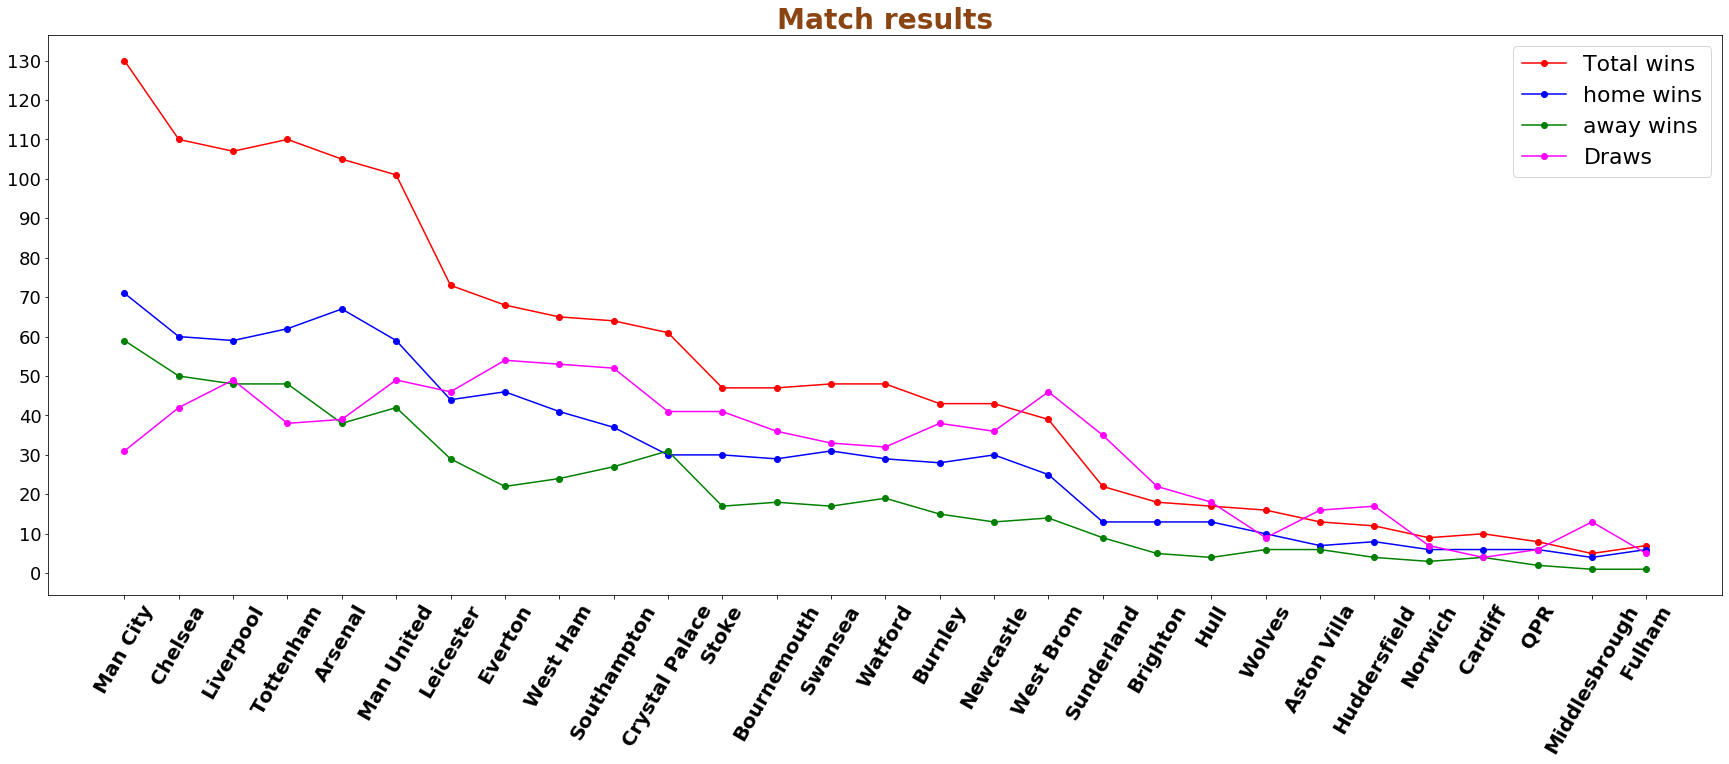

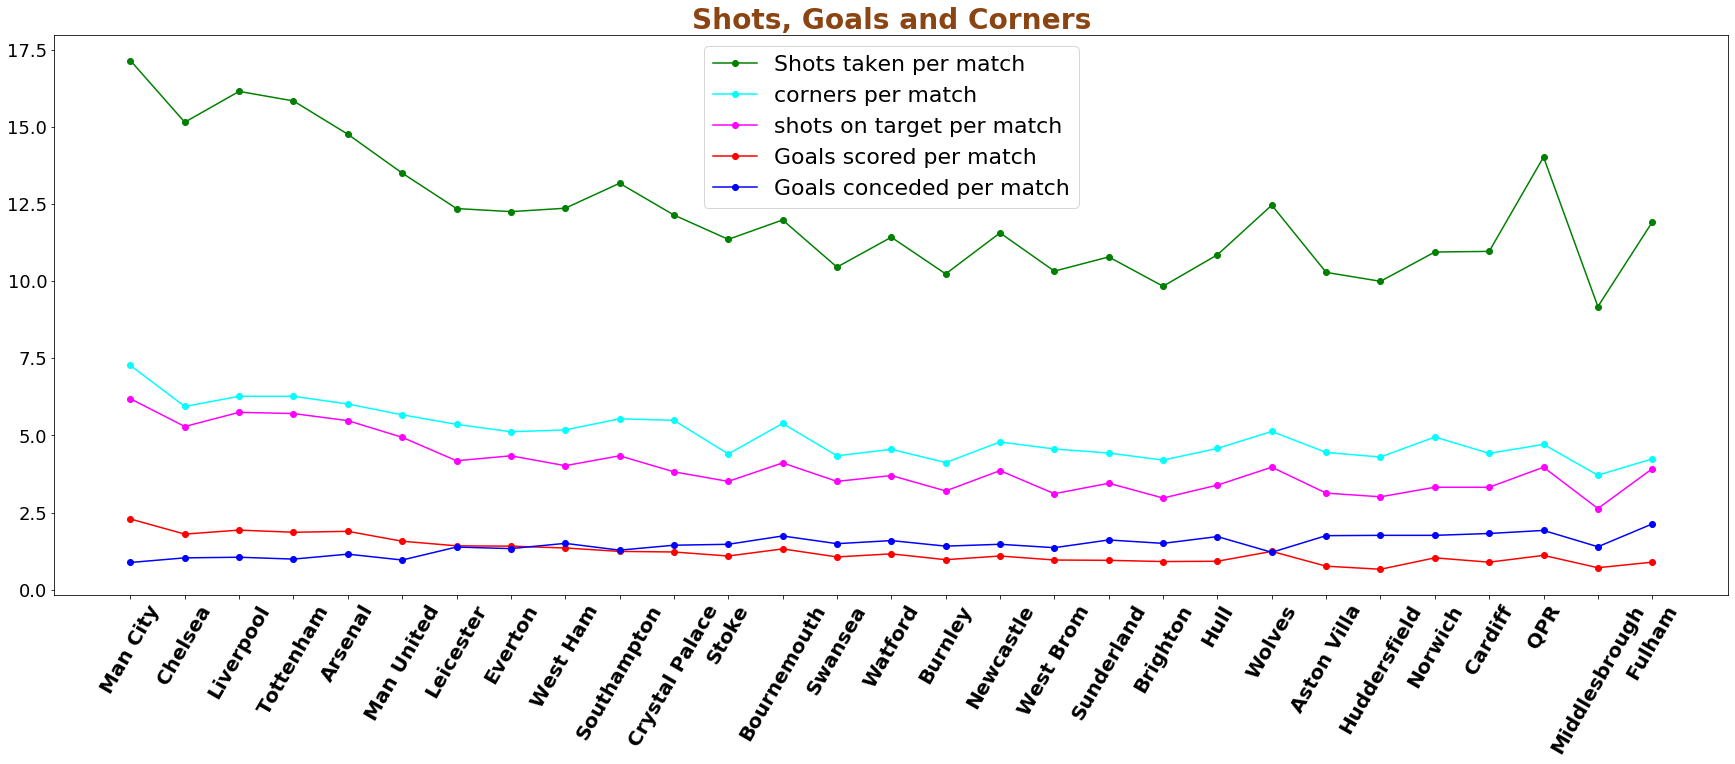

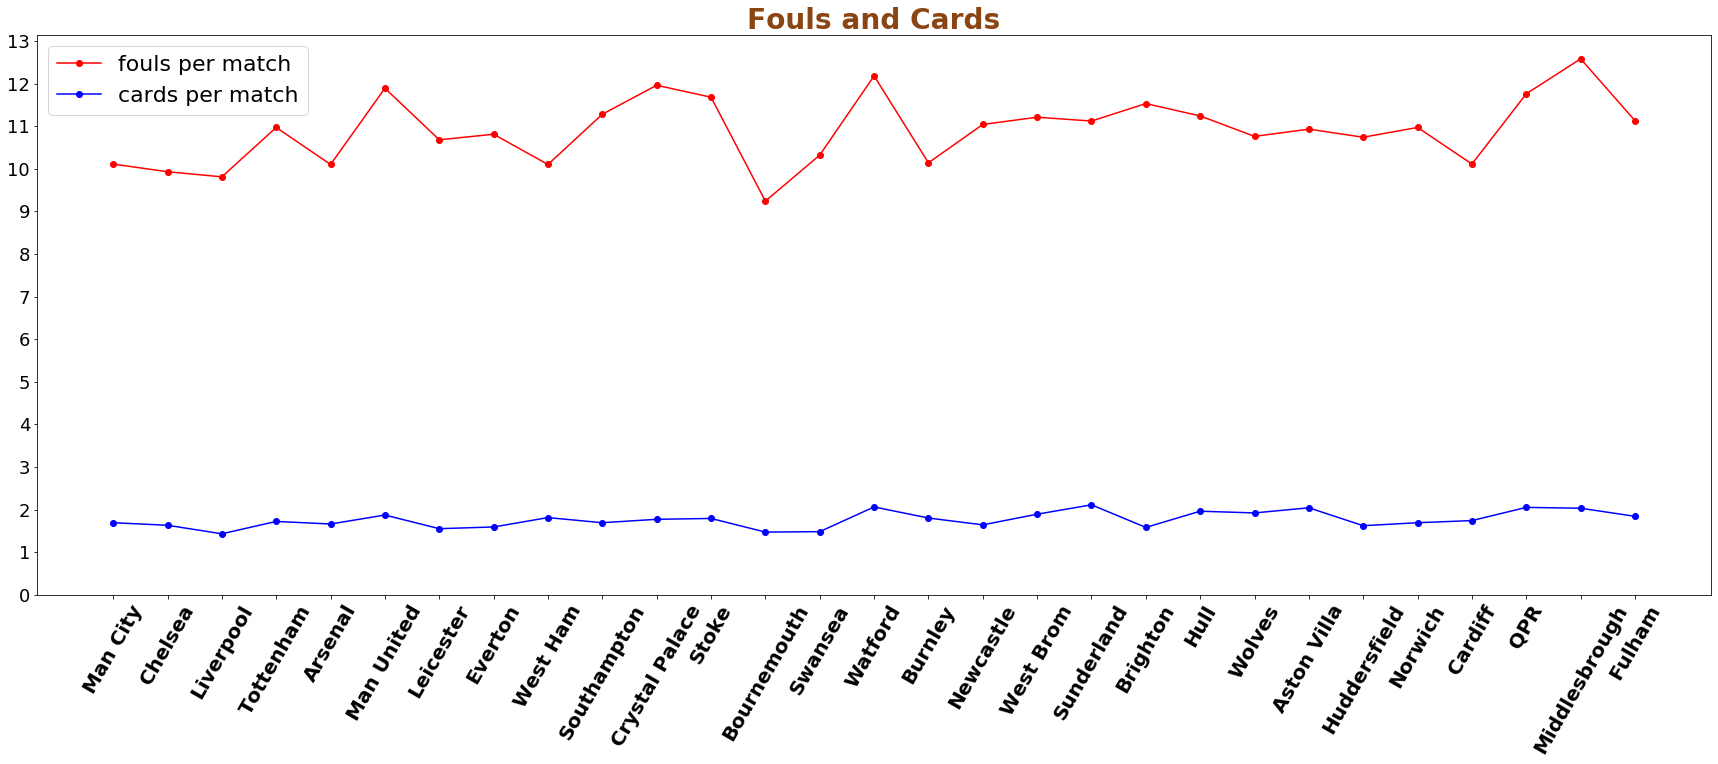

In [11]:
plt.figure(figsize = (30,35))
plt.subplot(311)
plt.plot(points_table_epl.index,points_table_epl['Total_wins'],marker = 'o',color = 'red',label = 'Total wins')
plt.plot(points_table_epl.index,points_table_epl['home_wins'],marker = 'o',color = 'blue',label = 'home wins')
plt.plot(points_table_epl.index,points_table_epl['away_wins'],marker = 'o',color = 'green',label = 'away wins')
plt.plot(points_table_epl.index,points_table_epl['Draws'],marker = 'o',color = 'magenta',label = 'Draws')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,140,10),fontsize = 18)
plt.title('Match results',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(312)
plt.plot(points_table_epl.index,points_table_epl['shot_taken_per_match'],marker = 'o',color = 'green',label = 'Shots taken per match')
plt.plot(points_table_epl.index,points_table_epl['corners_per_match'],marker = 'o',color = 'cyan',label = 'corners per match')
plt.plot(points_table_epl.index,points_table_epl['shot_on_target_per_match'],marker = 'o',color = 'magenta',label = 'shots on target per match')
plt.plot(points_table_epl.index,points_table_epl['goals_scored_per_match'],marker = 'o',color = 'red',label = 'Goals scored per match')
plt.plot(points_table_epl.index,points_table_epl['goals_conceded_per_match'],marker = 'o',color =  'blue',label = 'Goals conceded per match')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 18)
plt.title('Shots, Goals and Corners',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(313)
plt.plot(points_table_epl.index,points_table_epl['fouls_per_match'],marker = 'o',color = 'red',label = 'fouls per match')
plt.plot(points_table_epl.index,points_table_epl['yellow_cards_per_match'] + points_table_epl['red_cards_per_match'],marker = 'o',color = 'blue',label = 'cards per match')
#plt.plot(points_table_epl.index,,marker = 'o',color = 'magenta',label = 'total red cards')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,14,1),fontsize = 18)
plt.title('Fouls and Cards',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.show()

- By these plots we can see manchester city has dominated in all most every aspect of the game
- We can see arsenal is a great team at home but has struggled a lot in away game over the last 5 years
- From the top 4 teams chelsea is the least attacking team
- Watford commits the most number of fouls, but number of fouls does not really effect the results that much.
- We can see although wolves has played only 1 season but they have performed quite good.



### Big 6 Comparision

- There is a familiar category called big 6 which include top 6 clubs of the league i.e man city, chelsea, liverpool, man united, arsenal and tottenham. So, we are going to visualize the comparisions between these 6 clubs over the last 5 seasons

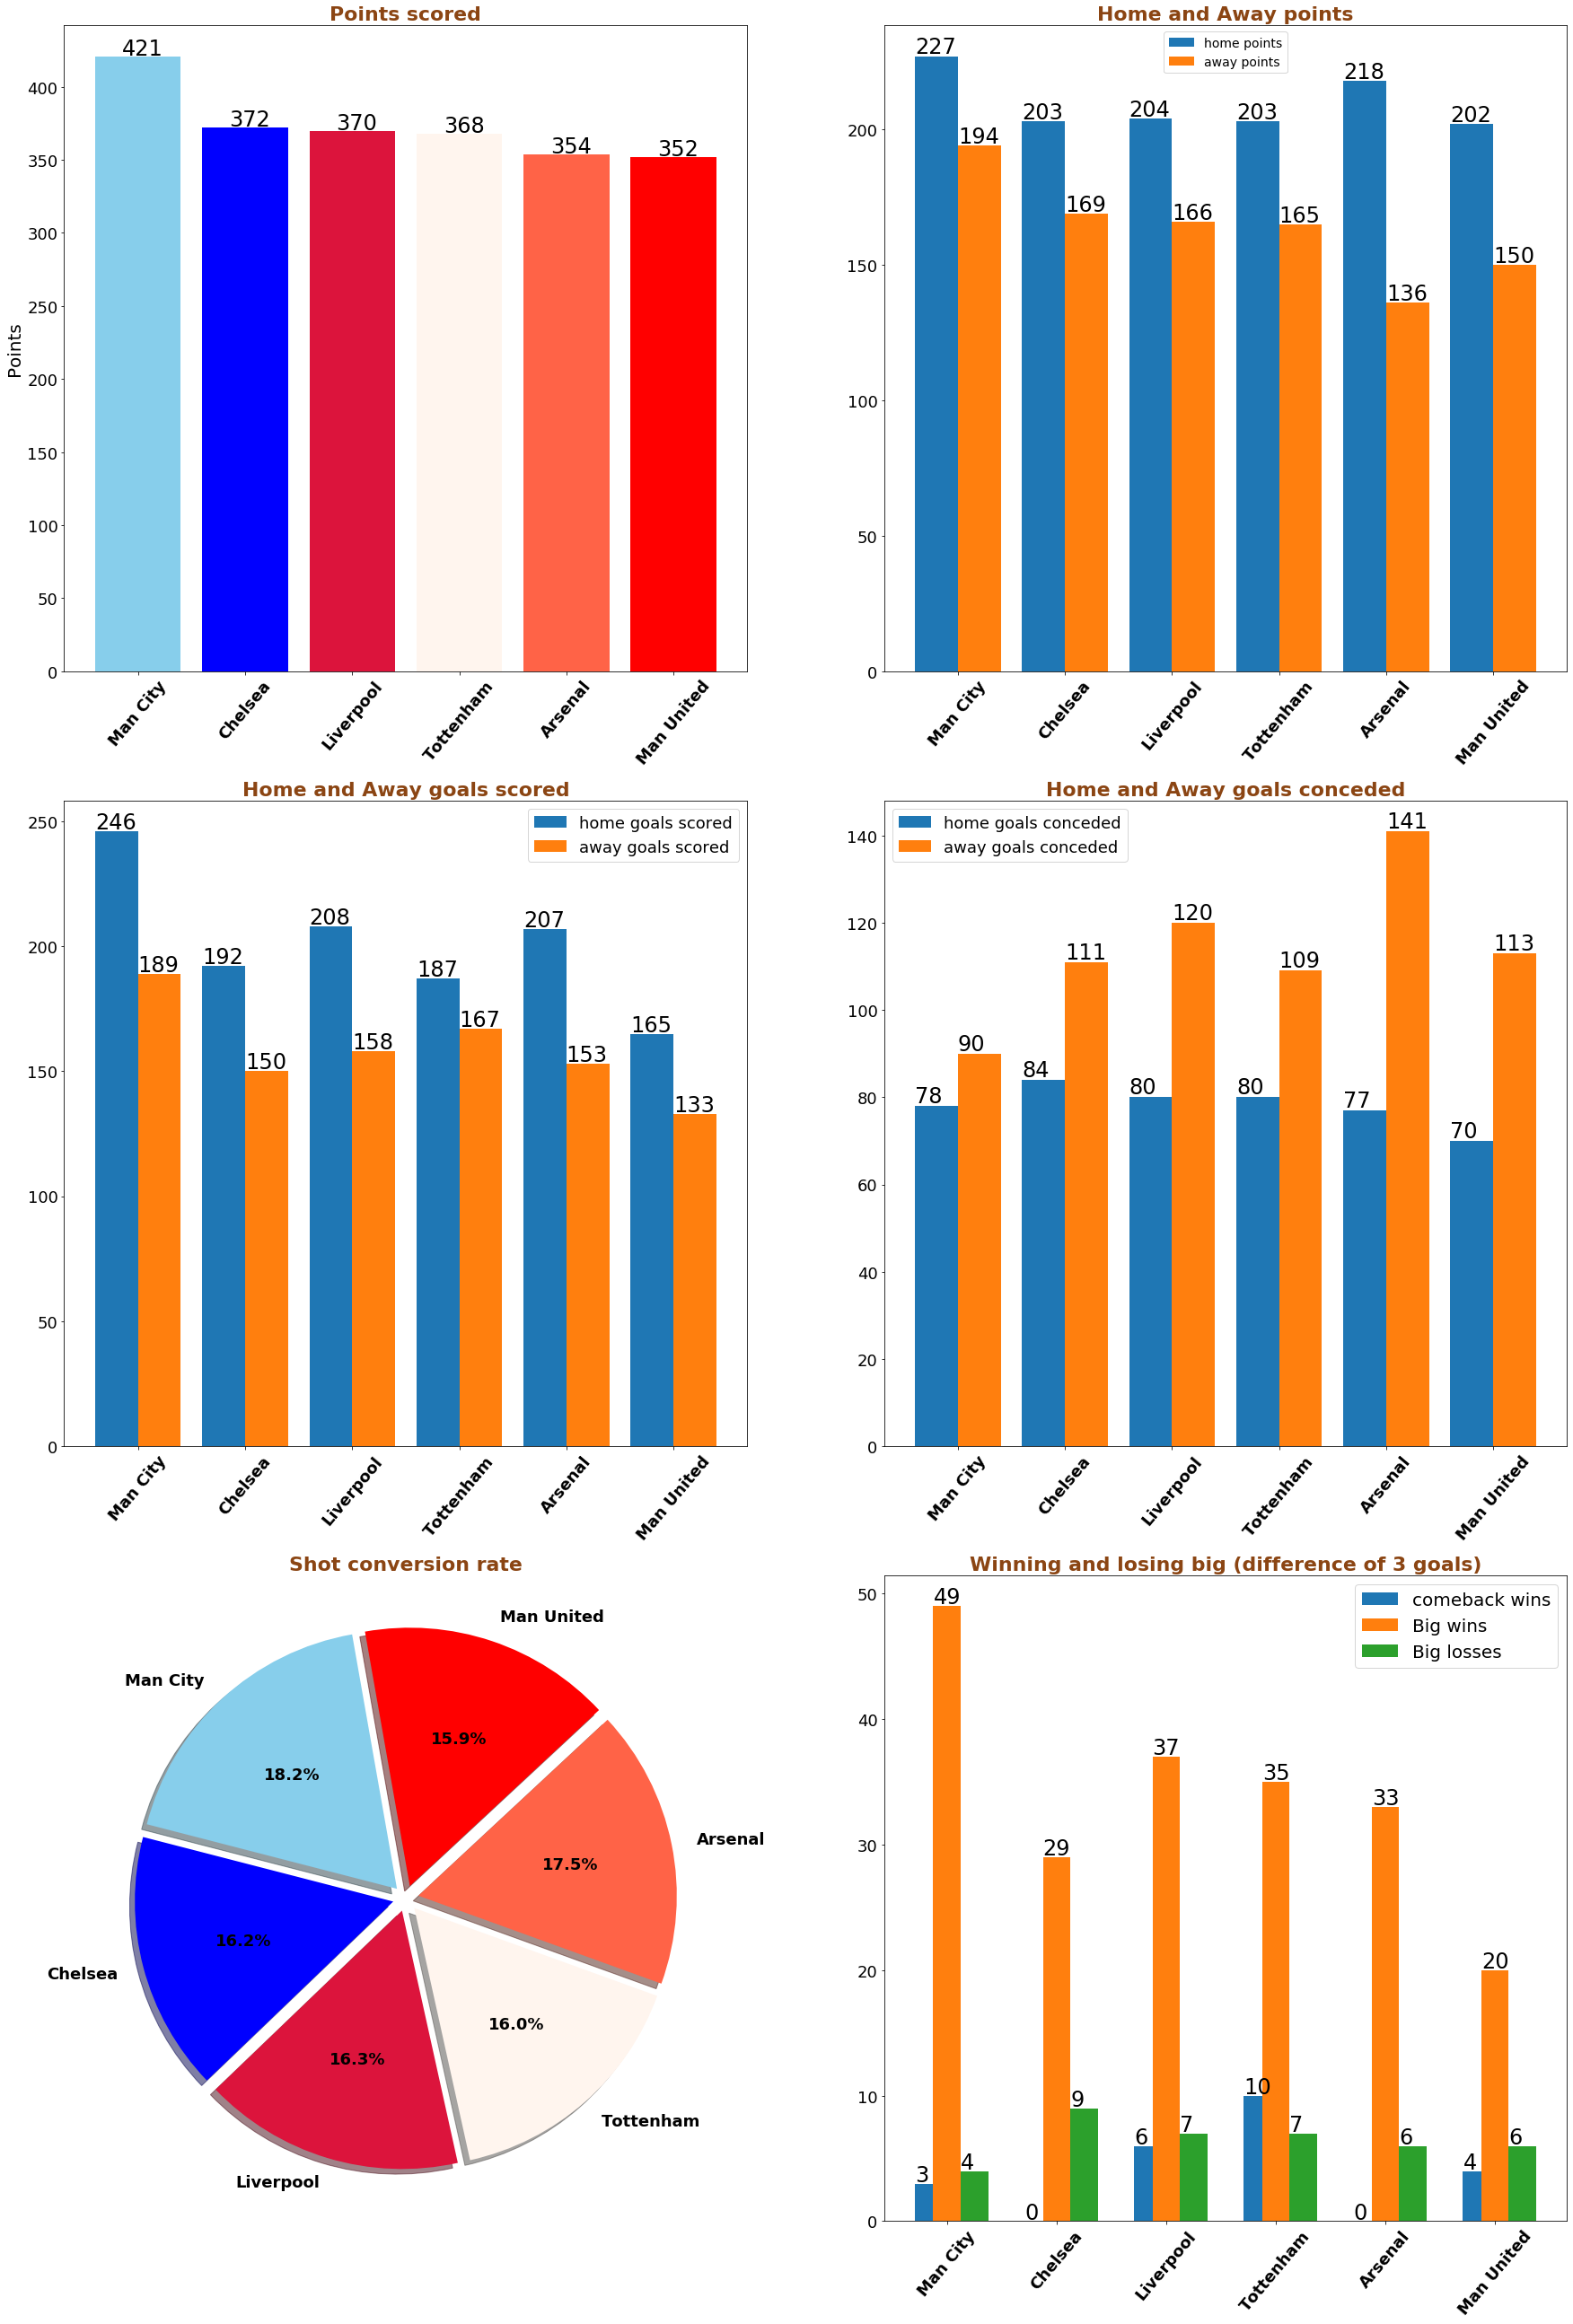

In [12]:
Big_6_epl = points_table_epl[:6]

fig,ax = plt.subplots(3,2,figsize = (30,45))
ax[0,0].bar(Big_6_epl.index,Big_6_epl['Total_points_won'],color = ['skyblue','blue','crimson','seashell','tomato','red'])
ax[0,0].set_ylabel('Points',fontsize = 20)
ax[0,0].set_yticklabels(range(0,500,50),fontsize = 18)
ax[0,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,0].set_title('Points scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x()+0.25,i.get_height()+1.2,str(i.get_height()),fontsize = 24)

    
x = np.arange(len(Big_6_epl.index))
w = 0.40
ax[0,1].bar(x - w/2,Big_6_epl['home_points'],w,label = 'home points')
ax[0,1].bar(x + w/2,Big_6_epl['away_points'],w,label = 'away points')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,1].set_yticklabels(range(0,300,50),fontsize = 18)
ax[0,1].legend(loc = 'upper center',fontsize = 14)
ax[0,1].set_title('Home and Away points',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)


ax[1,0].bar(x-w/2,Big_6_epl['home_goals_scored'],w,label = 'home goals scored')
ax[1,0].bar(x+w/2,Big_6_epl['away_goals_scored'],w,label = 'away goals scored')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,0].set_yticklabels(range(0,300,50),fontsize = 18)
ax[1,0].legend(fontsize = 18)
ax[1,0].set_title('Home and Away goals scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)

    
ax[1,1].bar(x-w/2,Big_6_epl['home_goals_conceded'],w,label = 'home goals conceded')
ax[1,1].bar(x+w/2,Big_6_epl['away_goals_conceded'],w,label = 'away goals conceded')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,1].set_yticklabels(range(0,180,20),fontsize = 18)
ax[1,1].legend(fontsize = 18)
ax[1,1].set_title('Home and Away goals conceded',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x(),i.get_height()+0.8,str(i.get_height()),fontsize = 24)

ax[2,0].pie(100 * Big_6_epl['goals_scored_per_match']/Big_6_epl['shot_taken_per_match'],autopct = '%1.1f%%',startangle = 100,labels = Big_6_epl.index,shadow = True,explode = (0.05,0.05,0.05,0.05,0.05,0.05),colors = ('skyblue','blue','crimson','seashell','tomato','red'),textprops = {'fontsize':18, 'fontweight':'bold'})
ax[2,0].set_title('Shot conversion rate',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')

w = 0.25
ax[2,1].bar(x-2*w/3,Big_6_epl['comeback_wins'],w,label = 'comeback wins')
ax[2,1].bar(x,Big_6_epl['Big_wins'],w,label = 'Big wins')
ax[2,1].bar(x+w,Big_6_epl['Big_loss'],w,label = 'Big losses')
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[2,1].set_yticklabels(range(0,60,10),fontsize = 18)
ax[2,1].legend(fontsize = 20)
ax[2,1].set_title('Winning and losing big (difference of 3 goals)',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[2,1].patches:
    ax[2,1].text(i.get_x(),i.get_height()+0.2,str(i.get_height()),fontsize = 24)

plt.show()

- Again we can see the domiminance of manchester city comapared to other 5.
- Arsenal is excellent in home but really poor away, conceding 140+ away goals is really bad.
- We can see man city does not just win but they do it in style.



In [13]:
points_table_epl.columns

Index(['Total games', 'home_wins', 'home_loss', 'away_wins', 'away_loss',
       'Draws', 'home_goals_scored', 'away_goals_scored',
       'home_goals_conceded', 'away_goals_conceded', 'clean sheets',
       'goal_difference', 'goals_scored_per_match', 'goals_conceded_per_match',
       'shot_taken_per_match', 'shot_on_target_per_match', 'fouls_per_match',
       'yellow_cards_per_match', 'red_cards_per_match', 'corners_per_match',
       'Total_wins', 'home_points', 'away_points', 'comeback_wins', 'Big_wins',
       'Big_loss', 'Total_points_won', 'points_per_match'],
      dtype='object')

In [14]:
df_epl

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,refree,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,2,13,19,9,3,2,2,0,1,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,16,10,3,6,1,1,0,0,1
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,4,14,20,4,0,2,4,0,0,1
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,4,10,10,8,9,1,2,0,0,1
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,14,9,2,8,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-12,Leicester,Chelsea,0,0,D,0,0,D,A Taylor,...,4,9,8,4,5,0,1,0,0,5
1896,2019-05-12,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,...,2,3,11,4,1,0,2,0,0,5
1897,2019-05-12,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,4,9,6,11,2,3,3,0,0,5
1898,2019-05-12,Watford,West Ham,1,4,A,0,2,A,C Kavanagh,...,9,10,10,7,2,1,0,1,0,5


# La liga (2016-2019)

### Merging the file of 5 years

In [15]:
a = pd.read_csv('Data/laliga_season-1819_csv.csv')
b = pd.read_csv('Data/laliga_season-1718_csv.csv')
c = pd.read_csv('Data/laliga_season-1617_csv.csv')
e = pd.read_csv('Data/laliga_season-1516_csv.csv')
f = pd.read_csv('Data/laliga_season-1415_csv.csv')
d = pd.concat([a,b,c,e,f])
df_laliga = pd.DataFrame(d)
df_laliga.describe()
#As we can see there is no data missing from the tables

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.563684,1.161053,0.681053,0.502632,13.494737,10.462632,4.838421,3.739474,13.822105,13.837895,5.656316,4.192632,2.443158,2.704737,0.104211,0.132105,2.886637,4.342753,5.477247
std,1.364813,1.180123,0.850833,0.726025,4.761115,4.308676,2.547639,2.196272,4.263063,4.206622,2.861796,2.447500,1.532664,1.487062,0.320747,0.362719,2.683875,2.092049,5.685942
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,2.500000,1.080000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,3.000000,2.000000,11.000000,11.000000,4.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.610000,3.300000,2.500000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,3.000000,14.000000,14.000000,5.000000,4.000000,2.000000,3.000000,0.000000,0.000000,2.100000,3.500000,3.600000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,17.000000,17.000000,7.000000,6.000000,3.000000,4.000000,0.000000,0.000000,2.890000,4.330000,5.750000
max,10.000000,8.000000,5.000000,5.000000,34.000000,28.000000,15.000000,13.000000,33.000000,29.000000,20.000000,17.000000,8.000000,9.000000,2.000000,3.000000,26.000000,17.000000,41.000000


In [16]:
df_laliga['Date'] = pd.to_datetime(df_laliga['Date'],format = '%d-%m-%Y')
df_laliga.sort_values(by = ['Date'],inplace = True) #sorting the dataset by date
df_laliga.reset_index(drop=True,inplace = True)
df_laliga.drop(['Div','B365H','B365D','B365A'],axis = 1,inplace = True) #dropping the div column as it is understood it is div1 and also the betting values
df_laliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2014-08-23,Almeria,Espanol,1,1,D,0,0,D,19,...,6,2,8,9,11,7,3,2,0,1
1,2014-08-23,Granada,La Coruna,2,1,H,0,1,A,10,...,3,1,13,26,5,3,1,2,0,0
2,2014-08-23,Malaga,Ath Bilbao,1,0,H,1,0,H,12,...,3,5,13,9,5,4,3,3,2,0
3,2014-08-23,Sevilla,Valencia,1,1,D,1,0,H,10,...,3,1,23,8,3,3,4,2,0,1
4,2014-08-24,Levante,Villarreal,0,2,A,0,0,D,9,...,2,6,11,14,3,4,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-18,Alaves,Girona,2,1,H,1,0,H,14,...,7,4,13,10,6,4,3,3,0,0
1896,2019-05-18,Valladolid,Valencia,0,2,A,0,1,A,19,...,4,6,12,10,8,2,1,3,0,0
1897,2019-05-18,Espanol,Sociedad,2,0,H,0,0,D,9,...,4,2,13,13,4,5,3,2,0,0
1898,2019-05-19,Real Madrid,Betis,0,2,A,0,0,D,9,...,2,7,17,11,1,5,4,1,0,0


In [17]:
df_laliga.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object

In [18]:
df_laliga.columns = ['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']
df_laliga['season'] = (df_laliga.index // 380) + 1
df_laliga.head()

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,home_shot,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-23,Almeria,Espanol,1,1,D,0,0,D,19,...,2,8,9,11,7,3,2,0,1,1
1,2014-08-23,Granada,La Coruna,2,1,H,0,1,A,10,...,1,13,26,5,3,1,2,0,0,1
2,2014-08-23,Malaga,Ath Bilbao,1,0,H,1,0,H,12,...,5,13,9,5,4,3,3,2,0,1
3,2014-08-23,Sevilla,Valencia,1,1,D,1,0,H,10,...,1,23,8,3,3,4,2,0,1,1
4,2014-08-24,Levante,Villarreal,0,2,A,0,0,D,9,...,6,11,14,3,4,1,3,0,0,1


In [19]:
print('Total teams played in these 5 years: ',df_laliga['awayteam'].nunique())
print('\nNames of those teams are:',df_laliga['awayteam'].unique())

Total teams played in these 5 years:  29

Names of those teams are: ['Espanol' 'La Coruna' 'Ath Bilbao' 'Valencia' 'Villarreal' 'Elche'
 'Getafe' 'Sociedad' 'Cordoba' 'Ath Madrid' 'Almeria' 'Malaga' 'Levante'
 'Eibar' 'Celta' 'Sevilla' 'Granada' 'Vallecano' 'Real Madrid' 'Barcelona'
 'Las Palmas' 'Betis' 'Sp Gijon' 'Osasuna' 'Alaves' 'Leganes' 'Girona'
 'Valladolid' 'Huesca']


### Number of matches played by each team

In [20]:
number_of_games_laliga = df_laliga['hometeam'].value_counts() + df_laliga['awayteam'].value_counts()
team_games_laliga = pd.DataFrame(number_of_games_laliga).sort_index(axis = 0) 
team_games_laliga.columns = ['Total games']
team_games_laliga

,Total games
Alaves,114
Almeria,38
Ath Bilbao,190
Ath Madrid,190
Barcelona,190
Betis,152
Celta,190
Cordoba,38
Eibar,190
Elche,38


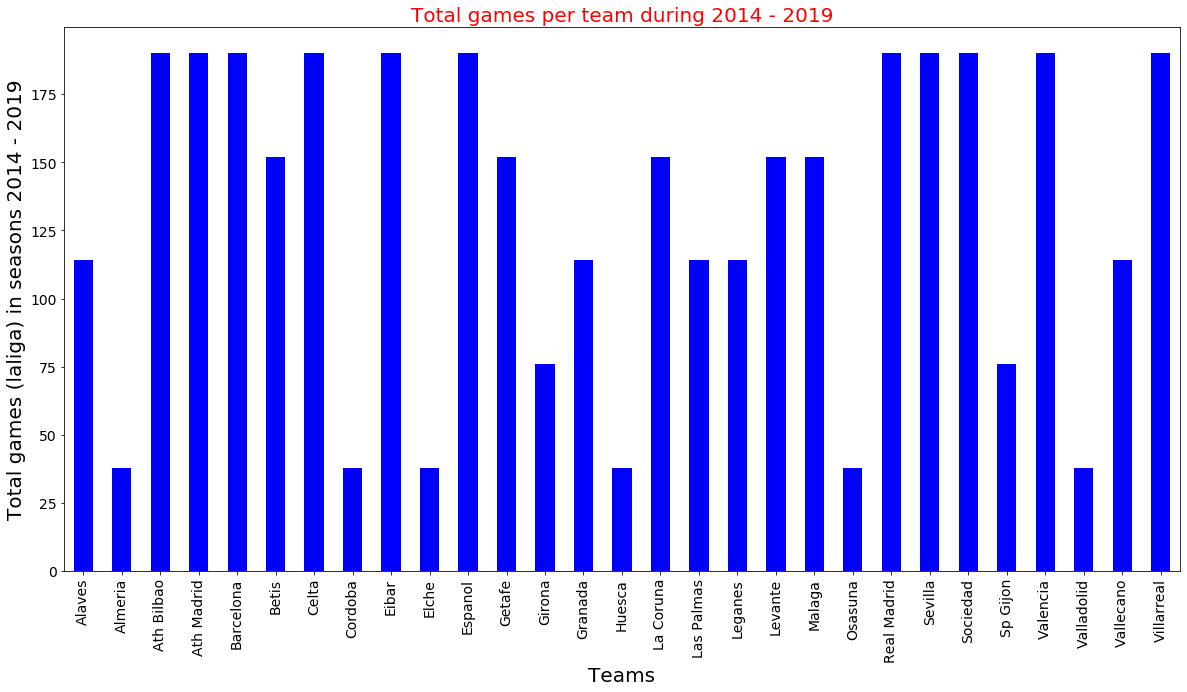

In [21]:
team_games_laliga.plot(kind='bar',color='blue', legend=False, figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Total games (laliga) in seasons 2014 - 2019',fontsize=20)
plt.title('Total games per team during 2014 - 2019',fontsize=20, color='red')
plt.show()

- We can see 10 teams have played all the 5 season


### Results for home and away matches

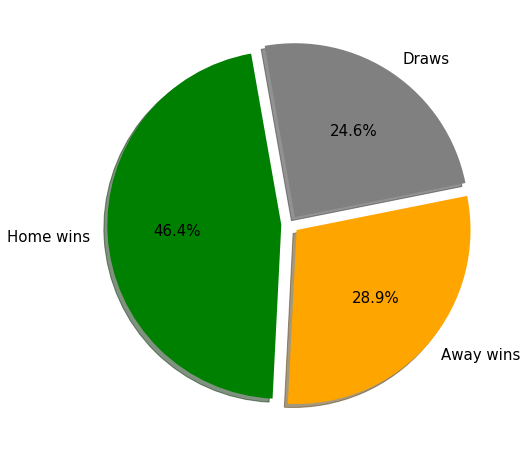

In [22]:
results = pd.DataFrame(df_laliga['fulltime_results'].value_counts())
fig = plt.figure(figsize = (8,8))
plt.pie(results,autopct = '%1.1f%%',startangle = 100,labels = ['Home wins','Away wins','Draws'],shadow = True,explode = (0.05,0.05,0.05),colors = ('green','orange','grey'),textprops = {'fontsize':15})
plt.show()

- We can see la liga has a bigger home advantage than epl


### Points Table with some stats

In [23]:
homewins = (df_laliga[df_laliga['fulltime_results'] == 'H'].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
homewins.index.names = ['Team']
homewins.columns = ['home_wins']

homeloss = (df_laliga[df_laliga['fulltime_results'] == 'A'].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
homeloss.index.names = ['Team']
homeloss.columns = ['home_loss']

awaywins = (df_laliga[df_laliga['fulltime_results'] == 'A'].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
awaywins.index.names = ['Team']
awaywins.columns = ['away_wins']

awayloss = (df_laliga[df_laliga['fulltime_results'] == 'H'].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
awayloss.index.names = ['Team']
awayloss.columns = ['away_loss']

homedraws = (df_laliga[df_laliga['fulltime_results'] == 'D'].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
homedraws.index.names = ['Team']
homedraws.columns = ['hdraws']

awaydraws = (df_laliga[df_laliga['fulltime_results'] == 'D'].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
awaydraws.index.names = ['Team']
awaydraws.columns = ['adraws']

total_draws = pd.DataFrame(homedraws['hdraws'] + awaydraws['adraws'])
total_draws.columns = ['Draws']

homegoals = (df_laliga[df_laliga['fulltime_home_goals'] >= 0].groupby([df_laliga.hometeam]).agg('sum'))[['fulltime_home_goals']]
homegoals.index.names = ['Team']
homegoals.columns = ['home_goals_scored']

homegoals2 = (df_laliga[df_laliga['fulltime_away_goals'] >= 0].groupby([df_laliga.hometeam]).agg('sum'))[['fulltime_away_goals']]
homegoals2.index.names = ['Team']
homegoals2.columns = ['home_goals_conceded']

awaygoals = (df_laliga[df_laliga['fulltime_away_goals'] >= 0].groupby([df_laliga.awayteam]).agg('sum'))[['fulltime_away_goals']]
awaygoals.index.names = ['Team']
awaygoals.columns = ['away_goals_scored']

awaygoals2 = (df_laliga[df_laliga['fulltime_home_goals'] >= 0].groupby([df_laliga.awayteam]).agg('sum'))[['fulltime_home_goals']]
awaygoals2.index.names = ['Team']
awaygoals2.columns = ['away_goals_conceded']

shotstaken1 = (df_laliga[df_laliga['home_shot'] >= 0].groupby([df_laliga.hometeam]).agg('sum'))[['home_shot']]
shotstaken1.index.names = ['Team']
shotstaken1.columns = ['shots_taken']

shotstaken2 = (df_laliga[df_laliga['home_shot'] >= 0].groupby([df_laliga.awayteam]).agg('sum'))[['away_shot']]
shotstaken2.index.names = ['Team']
shotstaken2.columns = ['shots_taken']

shotontarget1 = (df_laliga[df_laliga['home_shot_ontarget'] >= 0].groupby([df_laliga.hometeam]).agg('sum'))[['home_shot_ontarget']]
shotontarget1.index.names = ['Team']
shotontarget1.columns = ['shots_on_target']

shotontarget2 = (df_laliga[df_laliga['home_shot_ontarget'] >= 0].groupby([df_laliga.awayteam]).agg('sum'))[['away_shot_ontarget']]
shotontarget2.index.names = ['Team']
shotontarget2.columns = ['shots_on_target']

fouls1 = (df_laliga[df_laliga['home_fouls'] >= 0].groupby([df_laliga.hometeam]).agg(sum))[['home_fouls']]
fouls1.index.names =['Team']
fouls1.columns = ['fouls']


fouls2 = (df_laliga[df_laliga['home_fouls'] >= 0].groupby([df_laliga.awayteam]).agg(sum))[['away_fouls']]
fouls2.index.names =['Team']
fouls2.columns = ['fouls']

yellow_cards1 = (df_laliga[df_laliga['home_yellow'] >=0].groupby([df_laliga.hometeam]).agg(sum))[['home_yellow']]
yellow_cards1.index.names = ['Team']
yellow_cards1.columns = ['yellow_cards']

yellow_cards2 = (df_laliga[df_laliga['home_yellow'] >=0].groupby([df_laliga.awayteam]).agg(sum))[['away_yellow']]
yellow_cards2.index.names = ['Team']
yellow_cards2.columns = ['yellow_cards']

red_cards1 = (df_laliga[df_laliga['home_red'] >=0].groupby([df_laliga.hometeam]).agg(sum))[['home_red']]
red_cards1.index.names = ['Team']
red_cards1.columns = ['red_cards']

red_cards2 = (df_laliga[df_laliga['home_red'] >=0].groupby([df_laliga.awayteam]).agg(sum))[['away_red']]
red_cards2.index.names = ['Team']
red_cards2.columns = ['red_cards']

corner_taken1 = (df_laliga[df_laliga['home_corner'] >= 0].groupby([df_laliga.hometeam]).agg(sum))[['home_corner']]
corner_taken1.index.names = ['Team']
corner_taken1.columns = ['corners']

corner_taken2 = (df_laliga[df_laliga['home_corner'] >= 0].groupby([df_laliga.awayteam]).agg(sum))[['away_corner']]
corner_taken2.index.names = ['Team']
corner_taken2.columns = ['corners']

comebacks1 = (df_laliga[(df_laliga['halftime_results'] == 'A') & (df_laliga['fulltime_results'] == 'H')].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
comebacks1.index.names = ['Team']
comebacks1.columns = ['comebacks'] 

comebacks2 = (df_laliga[(df_laliga['halftime_results'] == 'H') & (df_laliga['fulltime_results'] == 'A')].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
comebacks2.index.names = ['Team']
comebacks2.columns = ['comebacks'] 

bigwins1 = (df_laliga[(df_laliga['fulltime_home_goals'] - df_laliga['fulltime_away_goals']) >= 3].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
bigwins1.index.names = ['Team']
bigwins1.columns = ['big_wins']

bigwins2 = (df_laliga[(df_laliga['fulltime_away_goals'] - df_laliga['fulltime_home_goals']) >= 3].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
bigwins2.index.names = ['Team']
bigwins2.columns = ['big_wins']

bigloss1 = (df_laliga[(df_laliga['fulltime_home_goals'] - df_laliga['fulltime_away_goals']) >= 3].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
bigloss1.index.names = ['Team']
bigloss1.columns = ['big_loss']

bigloss2 = (df_laliga[(df_laliga['fulltime_away_goals'] - df_laliga['fulltime_home_goals']) >= 3].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
bigloss2.index.names = ['Team']
bigloss2.columns = ['big_loss']

cs1 = (df_laliga[df_laliga['fulltime_away_goals'] == 0].groupby([df_laliga.hometeam]).agg('count'))[['fulltime_results']]
cs1.index.names = ['Team']
cs1.columns = ['cs']

cs2 = (df_laliga[df_laliga['fulltime_home_goals'] == 0].groupby([df_laliga.awayteam]).agg('count'))[['fulltime_results']]
cs2.index.names = ['Team']
cs2.columns = ['cs']

points_table_laliga = pd.concat([team_games_laliga,homewins,homeloss,awaywins,awayloss,total_draws,homegoals,awaygoals,homegoals2,awaygoals2],axis = 1)
points_table_laliga['clean sheets'] = cs1['cs'] + cs2['cs']
points_table_laliga['goal_difference'] = points_table_laliga['home_goals_scored'] + points_table_laliga['away_goals_scored'] - points_table_laliga['away_goals_conceded'] - points_table_laliga['home_goals_conceded']
points_table_laliga['goals_scored_per_match'] = (points_table_laliga['home_goals_scored'] + points_table_laliga['away_goals_scored'])/ points_table_laliga['Total games']
points_table_laliga['goals_scored_per_match'] = points_table_laliga['goals_scored_per_match'].apply(lambda x: round(x,2))
points_table_laliga['goals_conceded_per_match'] = (points_table_laliga['home_goals_conceded'] + points_table_laliga['away_goals_conceded'])/points_table_laliga['Total games']
points_table_laliga['goals_conceded_per_match'] = points_table_laliga['goals_conceded_per_match'].apply(lambda x: round(x,2))
points_table_laliga['shot_taken_per_match'] = (shotstaken1['shots_taken'] + shotstaken2['shots_taken'])/points_table_laliga['Total games']
points_table_laliga['shot_taken_per_match'] = points_table_laliga['shot_taken_per_match'].apply(lambda x: round(x,2))
points_table_laliga['shot_on_target_per_match'] = (shotontarget1['shots_on_target'] + shotontarget2['shots_on_target'])/points_table_laliga['Total games']
points_table_laliga['shot_on_target_per_match'] = points_table_laliga['shot_on_target_per_match'].apply(lambda x: round(x,2))
points_table_laliga['fouls_per_match'] = (fouls1['fouls'] + fouls2['fouls'])/points_table_laliga['Total games']
points_table_laliga['fouls_per_match'] = points_table_laliga['fouls_per_match'].apply(lambda x: round(x,2))
points_table_laliga['yellow_cards_per_match'] = (yellow_cards1['yellow_cards'] + yellow_cards2['yellow_cards'])/points_table_laliga['Total games']
points_table_laliga['yellow_cards_per_match'] = points_table_laliga['yellow_cards_per_match'].apply(lambda x: round(x,2))
points_table_laliga['red_cards_per_match'] = (red_cards1['red_cards'] + red_cards2['red_cards'])/points_table_laliga['Total games']
points_table_laliga['red_cards_per_match'] = points_table_laliga['red_cards_per_match'].apply(lambda x: round(x,2))
points_table_laliga['corners_per_match'] = (corner_taken1['corners'] + corner_taken2['corners'])/points_table_laliga['Total games']
points_table_laliga['corners_per_match'] = points_table_laliga['corners_per_match'].apply(lambda x: round(x,2))
points_table_laliga['Total_wins'] = points_table_laliga['home_wins'] + points_table_laliga['away_wins']
points_table_laliga['home_points'] = points_table_laliga['home_wins']*3 + homedraws['hdraws']
points_table_laliga['away_points'] = points_table_laliga['away_wins']*3 + awaydraws['adraws']
points_table_laliga['comeback_wins'] = comebacks1['comebacks'] + comebacks2['comebacks']
points_table_laliga['comeback_wins'].fillna(0,inplace = True)
points_table_laliga['comeback_wins'] = points_table_laliga['comeback_wins'].apply(lambda x: int(x))
points_table_laliga['Big_wins'] = bigwins1['big_wins'] + bigwins2['big_wins']
points_table_laliga['Big_wins'].fillna(0,inplace = True)
points_table_laliga['Big_wins'] = points_table_laliga['Big_wins'].apply(lambda x: int(x))
points_table_laliga['Big_loss'] = bigloss1['big_loss'] + bigloss2['big_loss']
points_table_laliga['Big_loss'].fillna(0,inplace = True)
points_table_laliga.fillna(0,inplace = True)
points_table_laliga['Big_loss'] = points_table_laliga['Big_loss'].apply(lambda x: int(x))
points_table_laliga['Total_points_won'] = points_table_laliga['Total_wins']*3 + points_table_laliga['Draws']
points_table_laliga['points_per_match'] = points_table_laliga['Total_points_won']/points_table_laliga['Total games']
points_table_laliga['points_per_match'] = points_table_laliga['points_per_match'].apply(lambda x: round(x,2))
points_table_laliga['away_wins'] = points_table_laliga['away_wins'].apply(lambda x: int(x))
points_table_laliga['Total_wins'] = points_table_laliga['Total_wins'].apply(lambda x: int(x))
points_table_laliga['away_points'] = points_table_laliga['away_points'].apply(lambda x: int(x))
points_table_laliga['Total_points_won'] = points_table_laliga['Total_points_won'].apply(lambda x: int(x))
points_table_laliga.sort_values(by = 'Total_points_won',ascending = False,inplace = True)
points_table_laliga.fillna(0,inplace = True)
points_table_laliga

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,red_cards_per_match,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match
Team,,,,,,,,,,,,,,,,,,,,,
Barcelona,190,78,6,63,11,32,299,228,70,82,...,0.05,5.88,141,245,210,7,67,0,455,2.39
Real Madrid,190,71,12,59,19,29,269,222,86,117,...,0.11,6.45,130,225,194,3,60,6,419,2.21
Ath Madrid,190,70,8,49,21,42,177,136,50,75,...,0.11,5.21,119,227,172,3,30,4,399,2.10
Sevilla,190,64,13,28,44,41,185,117,92,157,...,0.12,5.74,92,210,107,7,17,15,317,1.67
Valencia,190,49,19,34,36,52,159,129,93,125,...,0.16,4.89,83,174,127,3,20,5,301,1.58
Villarreal,190,51,24,30,32,53,153,101,95,112,...,0.10,4.84,81,173,123,0,13,9,296,1.56
Ath Bilbao,190,47,18,28,46,51,144,91,90,133,...,0.09,5.15,75,171,105,5,10,8,276,1.45
Sociedad,190,43,28,27,45,47,151,108,114,143,...,0.11,5.42,70,153,104,2,14,13,257,1.35
Espanol,190,44,26,22,46,52,121,99,109,158,...,0.08,4.36,66,157,93,0,7,19,250,1.32


### Important stats comparisions

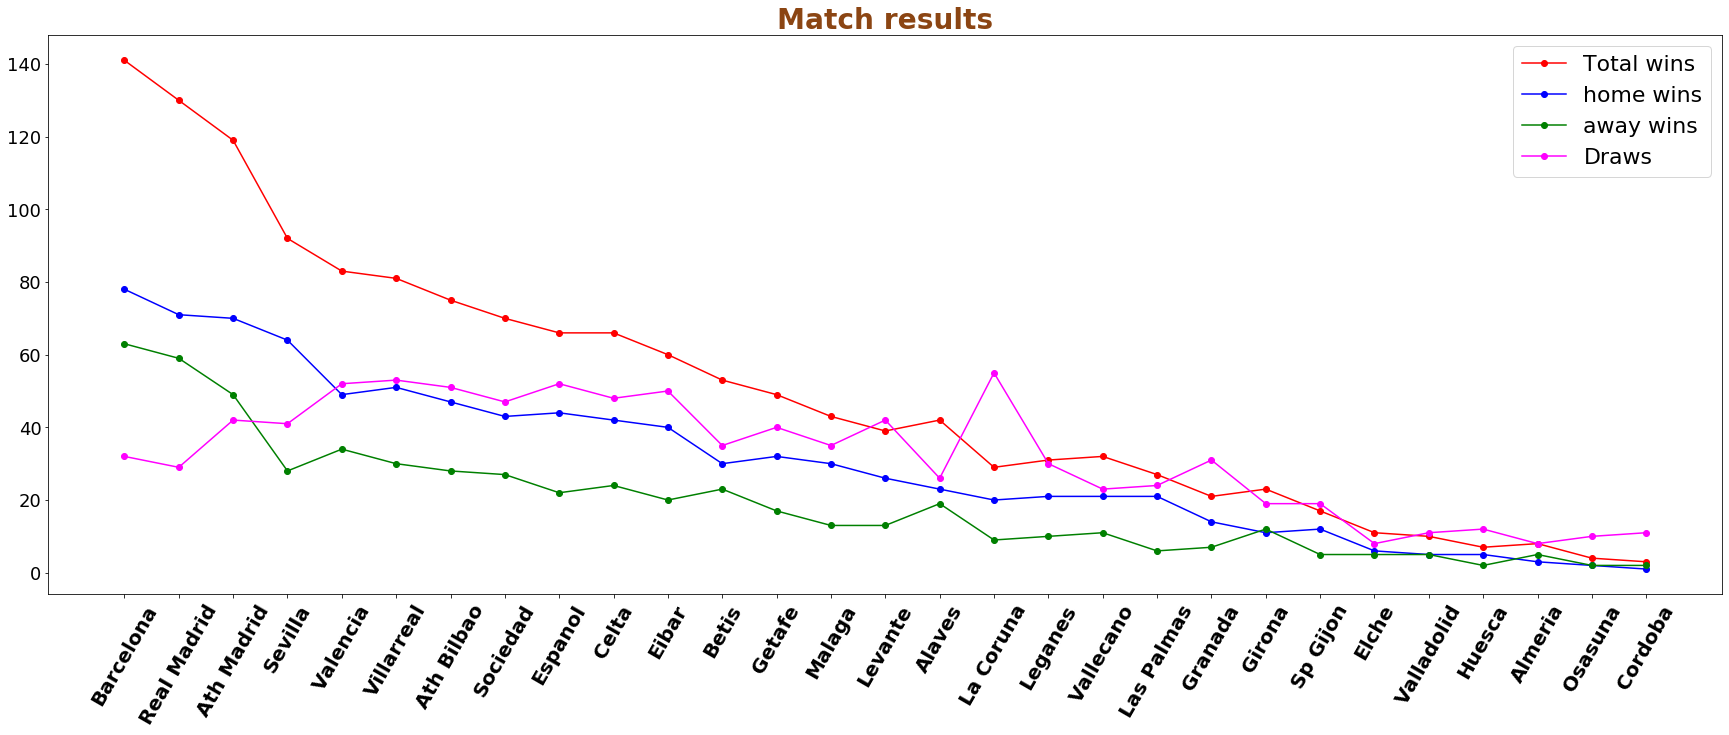

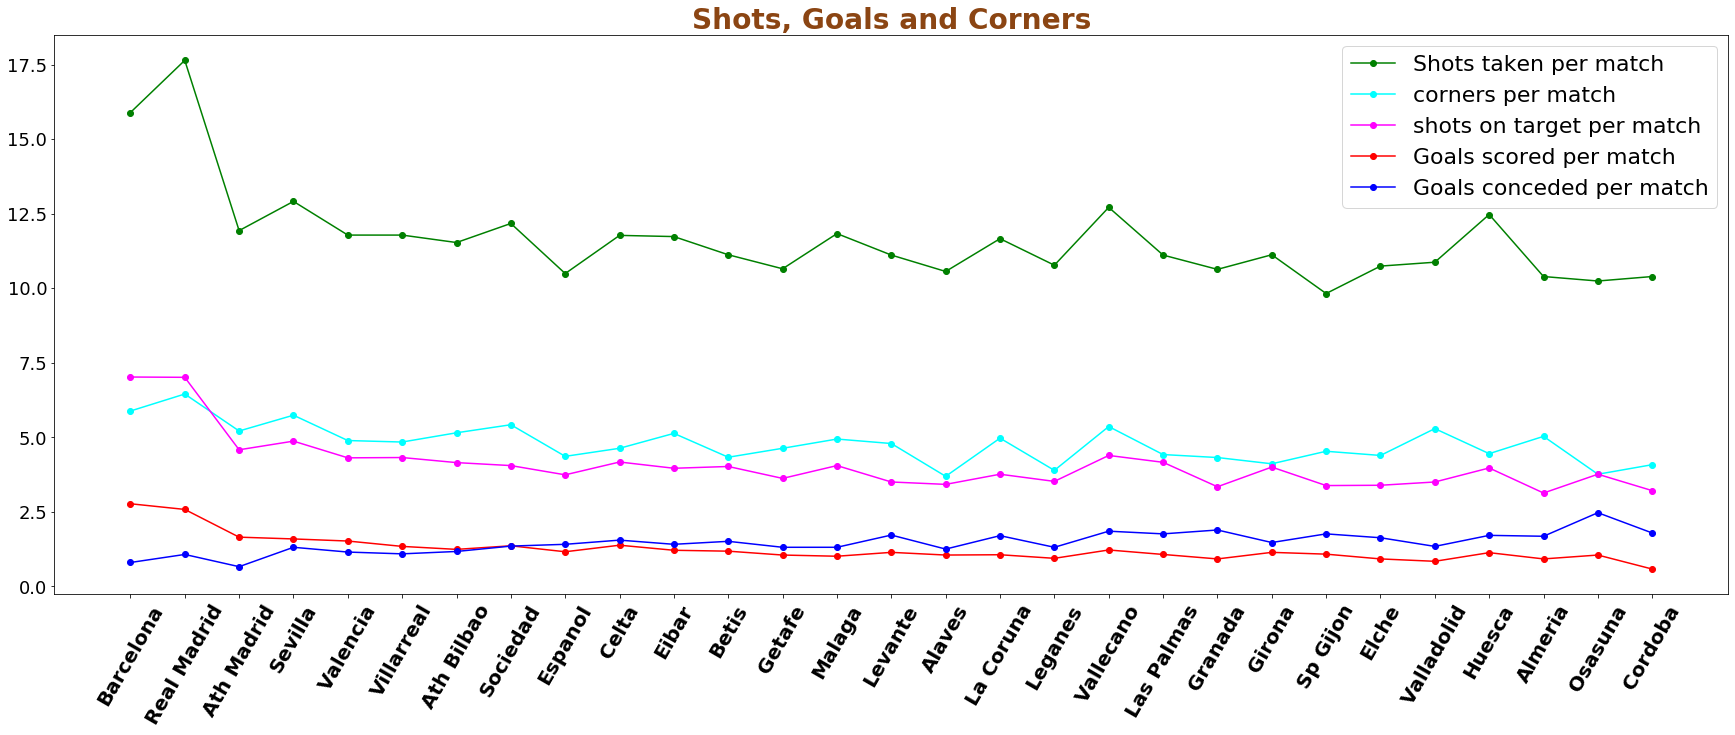

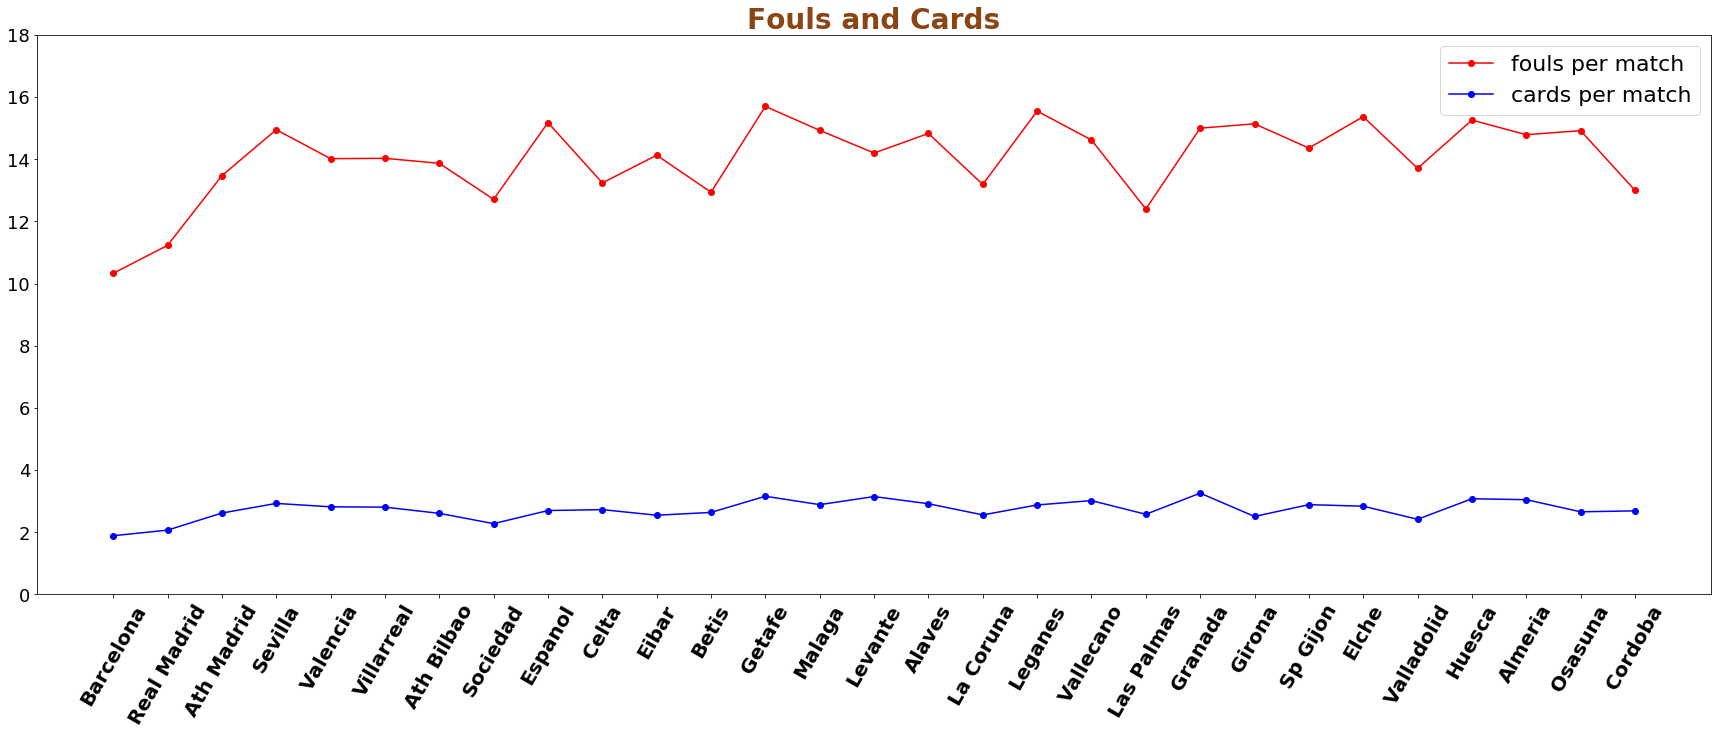

In [24]:
plt.figure(figsize = (30,35))
plt.subplot(311)
plt.plot(points_table_laliga.index,points_table_laliga['Total_wins'],marker = 'o',color = 'red',label = 'Total wins')
plt.plot(points_table_laliga.index,points_table_laliga['home_wins'],marker = 'o',color = 'blue',label = 'home wins')
plt.plot(points_table_laliga.index,points_table_laliga['away_wins'],marker = 'o',color = 'green',label = 'away wins')
plt.plot(points_table_laliga.index,points_table_laliga['Draws'],marker = 'o',color = 'magenta',label = 'Draws')
plt.xticks(points_table_laliga.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,160,20),fontsize = 18)
plt.title('Match results',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(312)
plt.plot(points_table_laliga.index,points_table_laliga['shot_taken_per_match'],marker = 'o',color = 'green',label = 'Shots taken per match')
plt.plot(points_table_laliga.index,points_table_laliga['corners_per_match'],marker = 'o',color = 'cyan',label = 'corners per match')
plt.plot(points_table_laliga.index,points_table_laliga['shot_on_target_per_match'],marker = 'o',color = 'magenta',label = 'shots on target per match')
plt.plot(points_table_laliga.index,points_table_laliga['goals_scored_per_match'],marker = 'o',color = 'red',label = 'Goals scored per match')
plt.plot(points_table_laliga.index,points_table_laliga['goals_conceded_per_match'],marker = 'o',color =  'blue',label = 'Goals conceded per match')
plt.xticks(points_table_laliga.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 18)
plt.title('Shots, Goals and Corners',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(313)
plt.plot(points_table_laliga.index,points_table_laliga['fouls_per_match'],marker = 'o',color = 'red',label = 'fouls per match')
plt.plot(points_table_laliga.index,points_table_laliga['yellow_cards_per_match'] + points_table_laliga['red_cards_per_match'],marker = 'o',color = 'blue',label = 'cards per match')
plt.xticks(points_table_laliga.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,20,2),fontsize = 18)
plt.title('Fouls and Cards',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.show()

- We can see top 3 teams i.e barcelona,real and atletico are way ahead of the rest
- Although barcelona has dominated the league but real madrid is close enough in all stats
- We can see real madrid is the most attacking team
- Atletico is the best defensive team.


### Big 6 Comparision

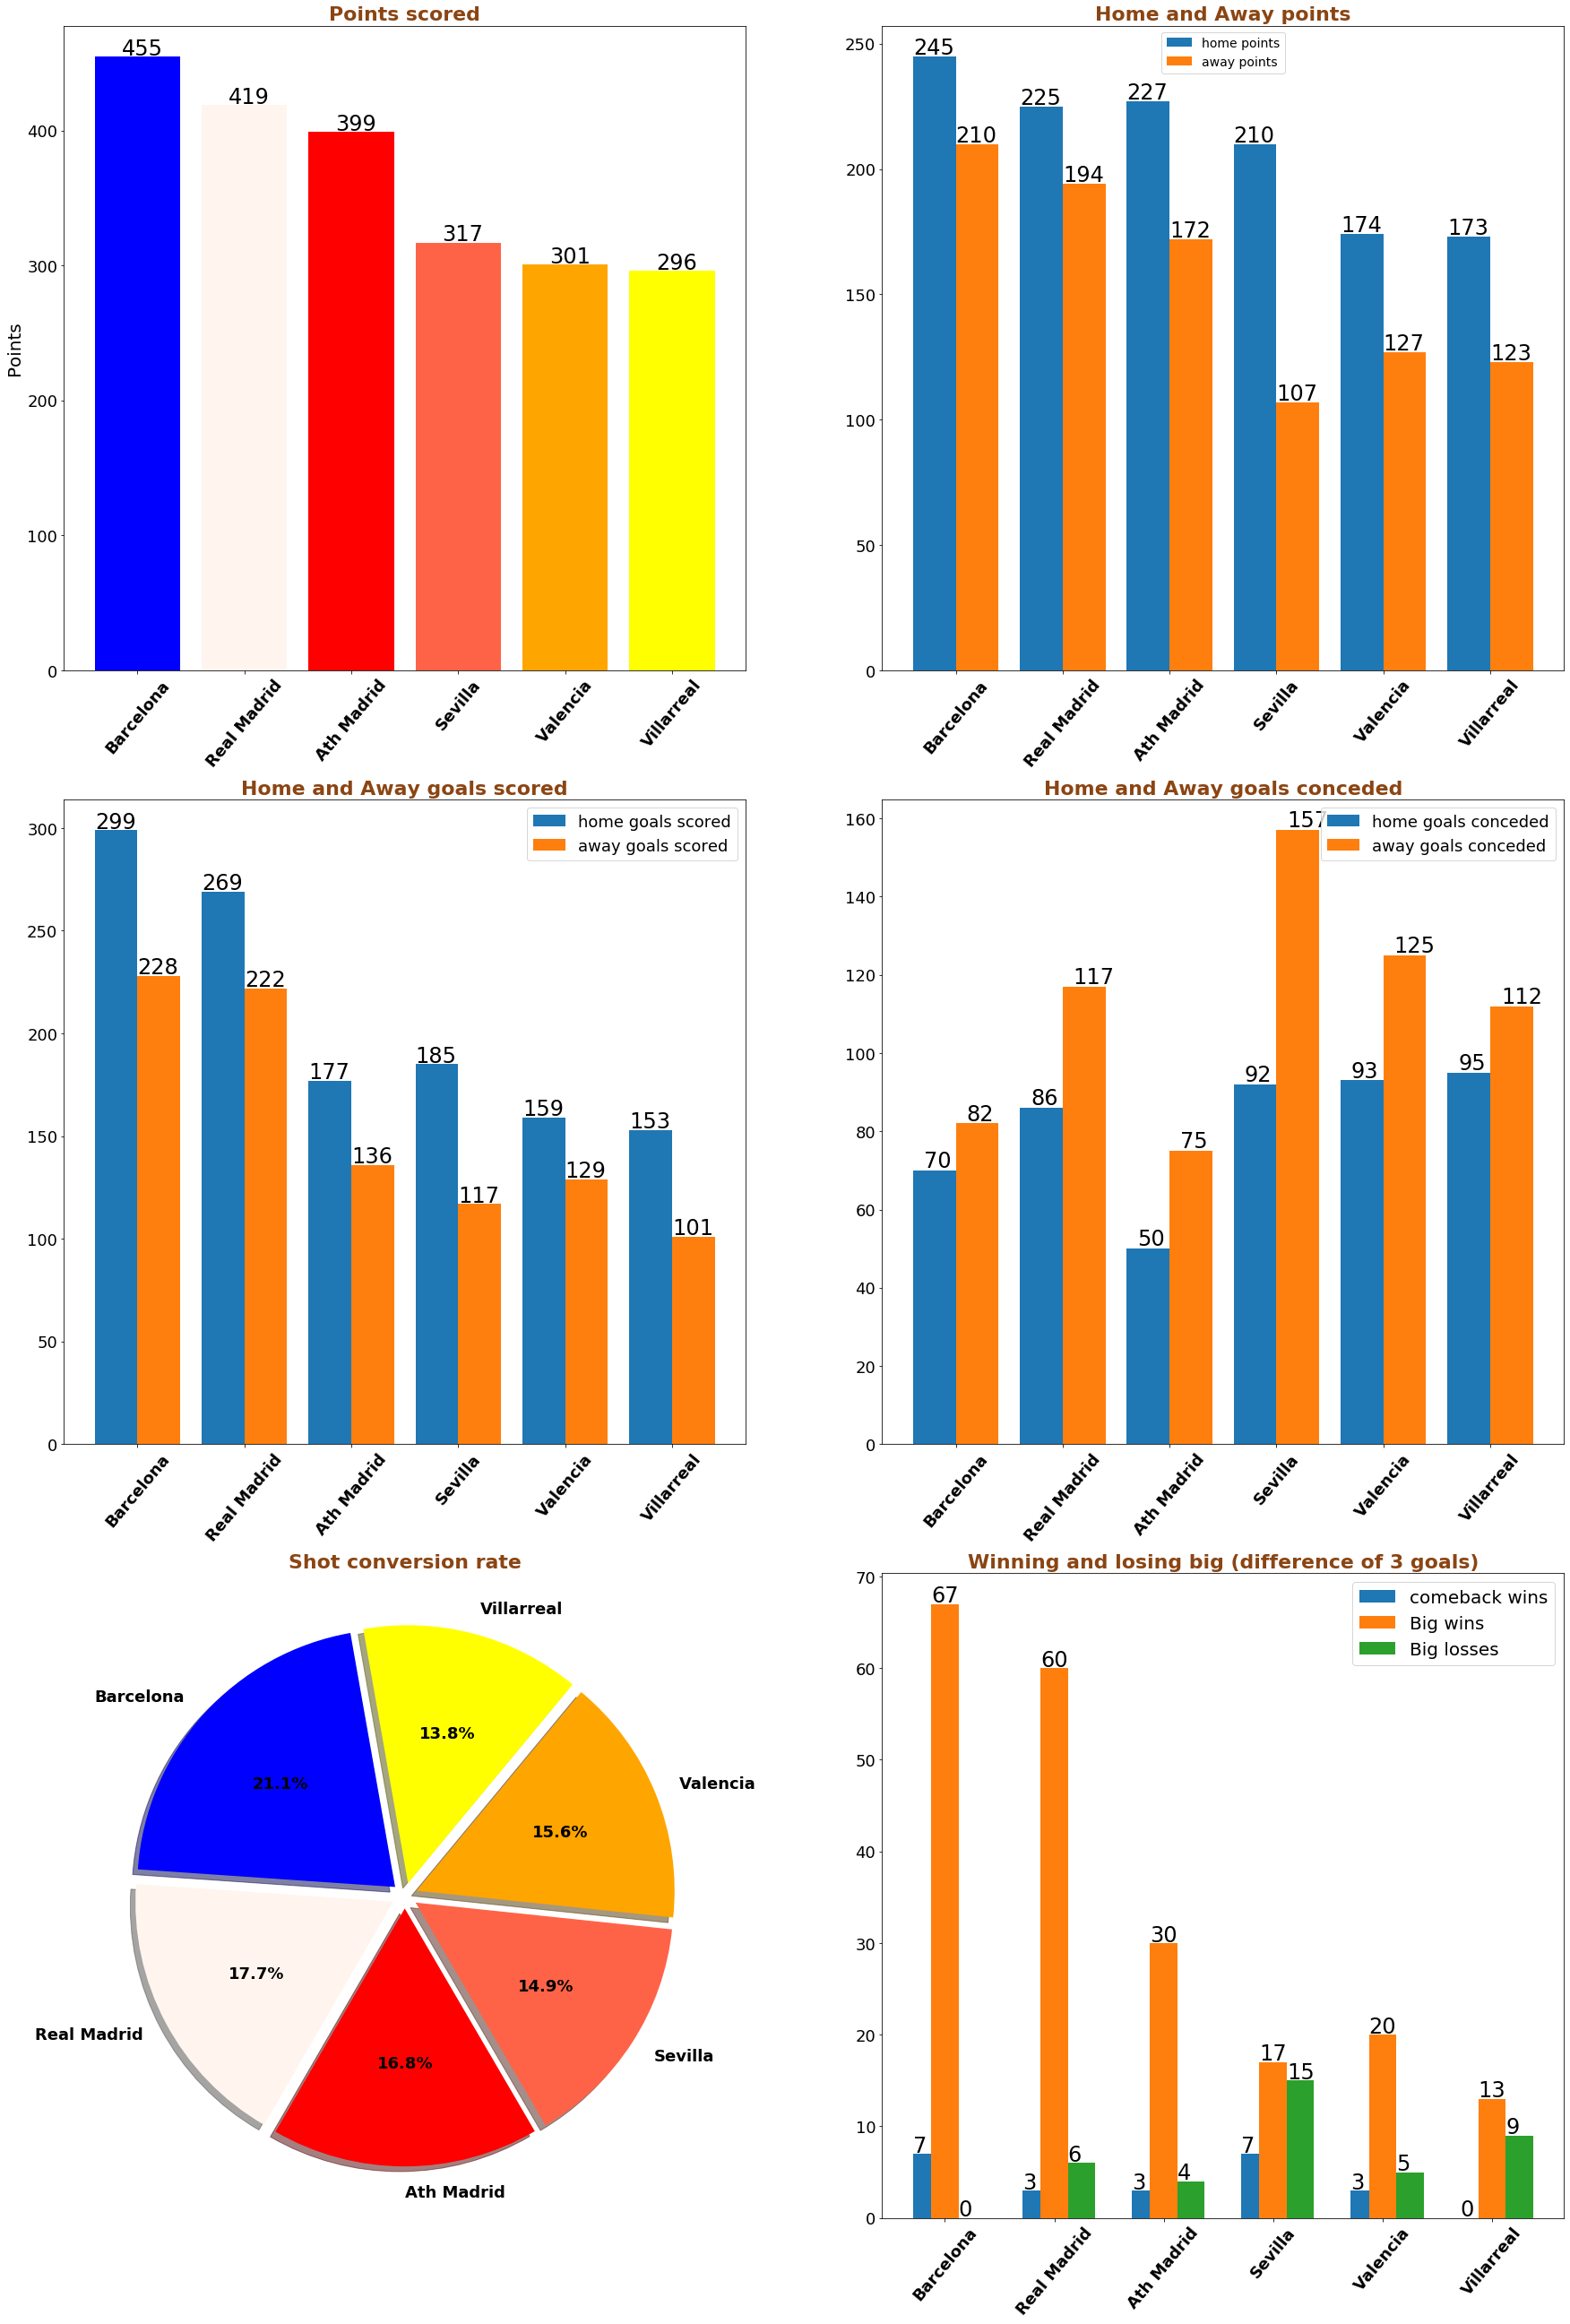

In [25]:
Big_6_laliga = points_table_laliga[:6]

fig,ax = plt.subplots(3,2,figsize = (30,45))
ax[0,0].bar(Big_6_laliga.index,Big_6_laliga['Total_points_won'],color = ['blue','seashell','red','tomato','orange','yellow'])
ax[0,0].set_ylabel('Points',fontsize = 20)
ax[0,0].set_yticklabels(range(0,500,100),fontsize = 18)
ax[0,0].set_xticklabels(Big_6_laliga.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,0].set_title('Points scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x()+0.25,i.get_height()+1.2,str(i.get_height()),fontsize = 24)

    
x = np.arange(len(Big_6_laliga.index))
w = 0.40
ax[0,1].bar(x - w/2,Big_6_laliga['home_points'],w,label = 'home points')
ax[0,1].bar(x + w/2,Big_6_laliga['away_points'],w,label = 'away points')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(Big_6_laliga.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,1].set_yticklabels(range(0,300,50),fontsize = 18)
ax[0,1].legend(loc = 'upper center',fontsize = 14)
ax[0,1].set_title('Home and Away points',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)


ax[1,0].bar(x-w/2,Big_6_laliga['home_goals_scored'],w,label = 'home goals scored')
ax[1,0].bar(x+w/2,Big_6_laliga['away_goals_scored'],w,label = 'away goals scored')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(Big_6_laliga.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,0].set_yticklabels(range(0,350,50),fontsize = 18)
ax[1,0].legend(fontsize = 18)
ax[1,0].set_title('Home and Away goals scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)

    
ax[1,1].bar(x-w/2,Big_6_laliga['home_goals_conceded'],w,label = 'home goals conceded')
ax[1,1].bar(x+w/2,Big_6_laliga['away_goals_conceded'],w,label = 'away goals conceded')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(Big_6_laliga.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,1].set_yticklabels(range(0,180,20),fontsize = 18)
ax[1,1].legend(fontsize = 18)
ax[1,1].set_title('Home and Away goals conceded',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x()+0.1,i.get_height()+0.8,str(i.get_height()),fontsize = 24)

ax[2,0].pie(100 * Big_6_laliga['goals_scored_per_match']/Big_6_laliga['shot_taken_per_match'],autopct = '%1.1f%%',startangle = 100,labels = Big_6_laliga.index,shadow = True,explode = (0.05,0.05,0.05,0.05,0.05,0.05),colors = ('blue','seashell','red','tomato','orange','yellow'),textprops = {'fontsize':18, 'fontweight':'bold'})
ax[2,0].set_title('Shot conversion rate',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')

w = 0.25
ax[2,1].bar(x-2*w/3,Big_6_laliga['comeback_wins'],w,label = 'comeback wins')
ax[2,1].bar(x,Big_6_laliga['Big_wins'],w,label = 'Big wins')
ax[2,1].bar(x+w,Big_6_laliga['Big_loss'],w,label = 'Big losses')
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(Big_6_laliga.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[2,1].set_yticklabels(range(0,80,10),fontsize = 18)
ax[2,1].legend(fontsize = 20)
ax[2,1].set_title('Winning and losing big (difference of 3 goals)',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[2,1].patches:
    ax[2,1].text(i.get_x(),i.get_height()+0.2,str(i.get_height()),fontsize = 24)

plt.show()

- We can see barcelona and real madrid are way better attacking teams than the rest.
- Where as atletico madrid has just conceded 125 goals in last 5 years which is a astonishing fact.
- Barcelona has fantastic shot conversion rate, 20+ conversion rate is really a brilliant one.
- The number of big wins shows the impact of messi and ronaldo for barcelona and real madrid



# Serie-a (2014-2019)

### Merging the file of 5 years

In [26]:
a = pd.read_csv('Data/seriea_season-1819_csv.csv')
b = pd.read_csv('Data/seriea_season-1718_csv.csv')
c = pd.read_csv('Data/seriea_season-1617_csv.csv')
e = pd.read_csv('Data/seriea_season-1516_csv.csv')
f = pd.read_csv('Data/seriea_season-1415_csv.csv')
d = pd.concat([a,b,c,e,f])
df_seriea = pd.DataFrame(d)
df_seriea.describe()
#As we can see there is no data missing from the tables

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1900.000000,1900.000000,1899.000000,1899.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1899.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.514211,1.202632,0.668246,0.520274,13.710000,11.217895,5.021053,4.083158,13.903684,14.156842,5.817368,4.741579,2.134281,2.424211,0.114737,0.158947,2.818437,3.990184,4.829174
std,1.268282,1.140703,0.829830,0.740934,5.451457,4.645732,2.670925,2.383114,4.330803,4.510549,3.102228,2.684588,1.276925,1.359554,0.341131,0.398786,2.021817,1.149725,3.954327
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.400000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,11.000000,11.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.610000,3.300000,2.290000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,14.000000,14.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.175000,3.600000,3.450000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,6.000000,17.000000,17.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000,3.250000,4.200000,6.000000
max,7.000000,7.000000,5.000000,4.000000,37.000000,30.000000,18.000000,13.000000,29.000000,32.000000,20.000000,19.000000,6.000000,8.000000,2.000000,2.000000,17.000000,15.000000,34.000000


In [27]:
df_seriea['Date'] = pd.to_datetime(df_seriea['Date'],format = '%d-%m-%Y')
df_seriea.sort_values(by = ['Date'],inplace = True) #sorting the dataset by date
df_seriea.reset_index(drop=True,inplace = True)
df_seriea.drop(['Div','B365H','B365D','B365A'],axis = 1,inplace = True) #dropping the div column as it is understood it is div1 and also the betting values
df_seriea

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2014-08-30,Chievo,Juventus,0,1,A,0.0,1.0,A,7,...,2,3,13,14,4,11,2.0,1,0,0
1,2014-08-30,Roma,Fiorentina,2,0,H,1.0,0.0,H,20,...,5,4,15,17,2,0,4.0,4,0,0
2,2014-08-31,Palermo,Sampdoria,1,1,D,1.0,0.0,H,8,...,1,3,15,18,1,7,1.0,2,0,1
3,2014-08-31,Milan,Lazio,3,1,H,1.0,0.0,H,7,...,4,4,10,20,0,10,2.0,3,0,0
4,2014-08-31,Udinese,Empoli,2,0,H,0.0,0.0,D,15,...,5,2,10,9,3,9,2.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-26,Spal,Milan,2,3,A,1.0,2.0,A,7,...,4,8,17,13,8,4,2.0,2,0,0
1896,2019-05-26,Atalanta,Sassuolo,3,1,H,1.0,1.0,D,13,...,5,3,10,15,7,4,2.0,4,0,2
1897,2019-05-26,Sampdoria,Juventus,2,0,H,0.0,0.0,D,10,...,3,1,6,12,7,6,0.0,2,0,0
1898,2019-05-26,Cagliari,Udinese,1,2,A,1.0,0.0,H,12,...,5,5,17,12,12,3,2.0,2,0,0


In [28]:
df_seriea.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                 float64
AY                   int64
HR                   int64
AR                   int64
dtype: object

In [29]:
df_seriea.columns = ['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']
df_seriea['season'] = (df_seriea.index // 380) + 1
df_seriea.head()

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,home_shot,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-30,Chievo,Juventus,0,1,A,0.0,1.0,A,7,...,3,13,14,4,11,2.0,1,0,0,1
1,2014-08-30,Roma,Fiorentina,2,0,H,1.0,0.0,H,20,...,4,15,17,2,0,4.0,4,0,0,1
2,2014-08-31,Palermo,Sampdoria,1,1,D,1.0,0.0,H,8,...,3,15,18,1,7,1.0,2,0,1,1
3,2014-08-31,Milan,Lazio,3,1,H,1.0,0.0,H,7,...,4,10,20,0,10,2.0,3,0,0,1
4,2014-08-31,Udinese,Empoli,2,0,H,0.0,0.0,D,15,...,2,10,9,3,9,2.0,2,0,0,1


In [30]:
print('Total teams played in these 5 years: ',df_seriea['awayteam'].nunique())
print('\nNames of those teams are:',df_seriea['awayteam'].unique())

Total teams played in these 5 years:  27

Names of those teams are: ['Juventus' 'Fiorentina' 'Sampdoria' 'Lazio' 'Empoli' 'Napoli' 'Cagliari'
 'Verona' 'Parma' 'Inter' 'Roma' 'Udinese' 'Atalanta' 'Genoa' 'Sassuolo'
 'Cesena' 'Chievo' 'Torino' 'Milan' 'Palermo' 'Bologna' 'Carpi'
 'Frosinone' 'Crotone' 'Pescara' 'Benevento' 'Spal']


### Number of matches played by each team

In [31]:
number_of_games_seriea = df_seriea['hometeam'].value_counts() + df_seriea['awayteam'].value_counts()
team_games_seriea = pd.DataFrame(number_of_games_seriea).sort_index(axis = 0) 
team_games_seriea.columns = ['Total games']
team_games_seriea

,Total games
Atalanta,190
Benevento,38
Bologna,152
Cagliari,152
Carpi,38
Cesena,38
Chievo,190
Crotone,76
Empoli,152
Fiorentina,190


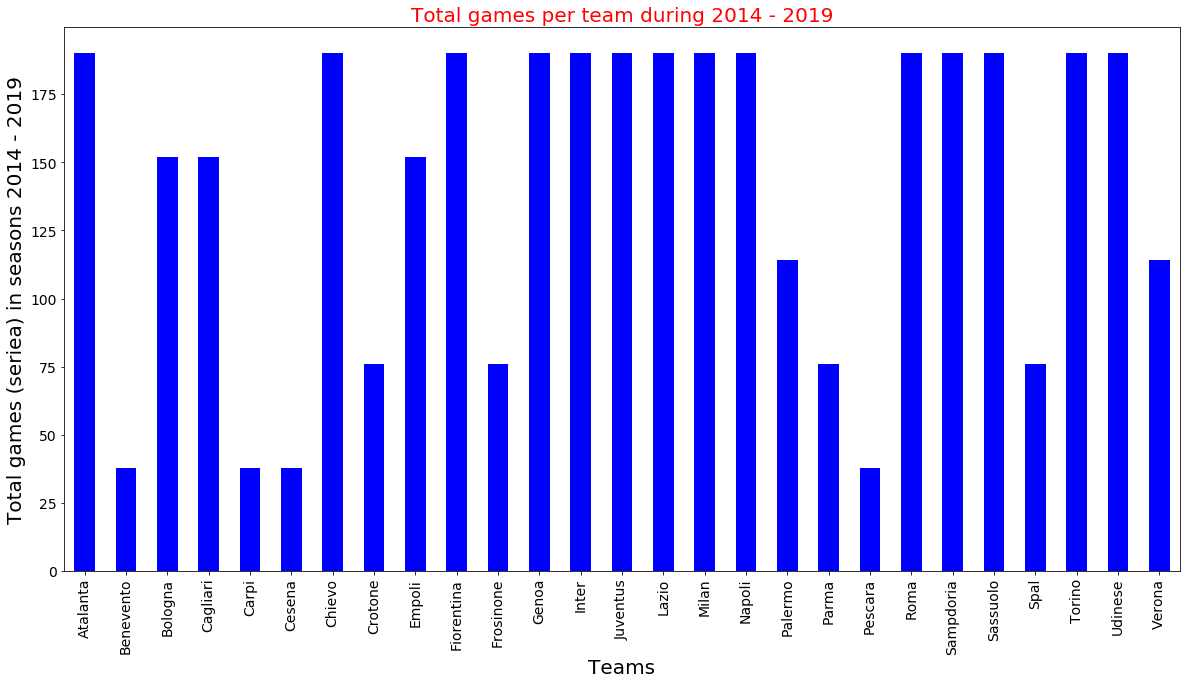

In [32]:
team_games_seriea.plot(kind='bar',color='blue', legend=False, figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Total games (seriea) in seasons 2014 - 2019',fontsize=20)
plt.title('Total games per team during 2014 - 2019',fontsize=20, color='red')
plt.show()

- 14 teams has played all the 5 seasons which the most among the 3 leagues. 

### Results for home and away matches

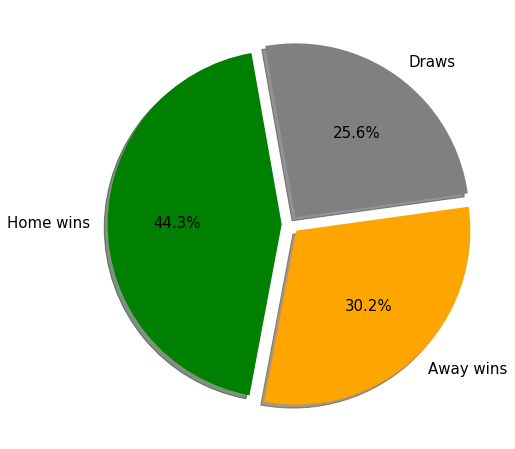

In [33]:
results = pd.DataFrame(df_seriea['fulltime_results'].value_counts())
fig = plt.figure(figsize = (8,8))
plt.pie(results,autopct = '%1.1f%%',startangle = 100,labels = ['Home wins','Away wins','Draws'],shadow = True,explode = (0.05,0.05,0.05),colors = ('green','orange','grey'),textprops = {'fontsize':15})
plt.show()

- This shows that serie a has the lowest home advantage

### Points Table with some stats

In [34]:
homewins = (df_seriea[df_seriea['fulltime_results'] == 'H'].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
homewins.index.names = ['Team']
homewins.columns = ['home_wins']

homeloss = (df_seriea[df_seriea['fulltime_results'] == 'A'].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
homeloss.index.names = ['Team']
homeloss.columns = ['home_loss']

awaywins = (df_seriea[df_seriea['fulltime_results'] == 'A'].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
awaywins.index.names = ['Team']
awaywins.columns = ['away_wins']

awayloss = (df_seriea[df_seriea['fulltime_results'] == 'H'].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
awayloss.index.names = ['Team']
awayloss.columns = ['away_loss']

homedraws = (df_seriea[df_seriea['fulltime_results'] == 'D'].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
homedraws.index.names = ['Team']
homedraws.columns = ['hdraws']

awaydraws = (df_seriea[df_seriea['fulltime_results'] == 'D'].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
awaydraws.index.names = ['Team']
awaydraws.columns = ['adraws']

total_draws = pd.DataFrame(homedraws['hdraws'] + awaydraws['adraws'])
total_draws.columns = ['Draws']

homegoals = (df_seriea[df_seriea['fulltime_home_goals'] >= 0].groupby([df_seriea.hometeam]).agg('sum'))[['fulltime_home_goals']]
homegoals.index.names = ['Team']
homegoals.columns = ['home_goals_scored']

homegoals2 = (df_seriea[df_seriea['fulltime_away_goals'] >= 0].groupby([df_seriea.hometeam]).agg('sum'))[['fulltime_away_goals']]
homegoals2.index.names = ['Team']
homegoals2.columns = ['home_goals_conceded']

awaygoals = (df_seriea[df_seriea['fulltime_away_goals'] >= 0].groupby([df_seriea.awayteam]).agg('sum'))[['fulltime_away_goals']]
awaygoals.index.names = ['Team']
awaygoals.columns = ['away_goals_scored']

awaygoals2 = (df_seriea[df_seriea['fulltime_home_goals'] >= 0].groupby([df_seriea.awayteam]).agg('sum'))[['fulltime_home_goals']]
awaygoals2.index.names = ['Team']
awaygoals2.columns = ['away_goals_conceded']

shotstaken1 = (df_seriea[df_seriea['home_shot'] >= 0].groupby([df_seriea.hometeam]).agg('sum'))[['home_shot']]
shotstaken1.index.names = ['Team']
shotstaken1.columns = ['shots_taken']

shotstaken2 = (df_seriea[df_seriea['home_shot'] >= 0].groupby([df_seriea.awayteam]).agg('sum'))[['away_shot']]
shotstaken2.index.names = ['Team']
shotstaken2.columns = ['shots_taken']

shotontarget1 = (df_seriea[df_seriea['home_shot_ontarget'] >= 0].groupby([df_seriea.hometeam]).agg('sum'))[['home_shot_ontarget']]
shotontarget1.index.names = ['Team']
shotontarget1.columns = ['shots_on_target']

shotontarget2 = (df_seriea[df_seriea['home_shot_ontarget'] >= 0].groupby([df_seriea.awayteam]).agg('sum'))[['away_shot_ontarget']]
shotontarget2.index.names = ['Team']
shotontarget2.columns = ['shots_on_target']

fouls1 = (df_seriea[df_seriea['home_fouls'] >= 0].groupby([df_seriea.hometeam]).agg(sum))[['home_fouls']]
fouls1.index.names =['Team']
fouls1.columns = ['fouls']


fouls2 = (df_seriea[df_seriea['home_fouls'] >= 0].groupby([df_seriea.awayteam]).agg(sum))[['away_fouls']]
fouls2.index.names =['Team']
fouls2.columns = ['fouls']

yellow_cards1 = (df_seriea[df_seriea['home_yellow'] >=0].groupby([df_seriea.hometeam]).agg(sum))[['home_yellow']]
yellow_cards1.index.names = ['Team']
yellow_cards1.columns = ['yellow_cards']

yellow_cards2 = (df_seriea[df_seriea['home_yellow'] >=0].groupby([df_seriea.awayteam]).agg(sum))[['away_yellow']]
yellow_cards2.index.names = ['Team']
yellow_cards2.columns = ['yellow_cards']

red_cards1 = (df_seriea[df_seriea['home_red'] >=0].groupby([df_seriea.hometeam]).agg(sum))[['home_red']]
red_cards1.index.names = ['Team']
red_cards1.columns = ['red_cards']

red_cards2 = (df_seriea[df_seriea['home_red'] >=0].groupby([df_seriea.awayteam]).agg(sum))[['away_red']]
red_cards2.index.names = ['Team']
red_cards2.columns = ['red_cards']

corner_taken1 = (df_seriea[df_seriea['home_corner'] >= 0].groupby([df_seriea.hometeam]).agg(sum))[['home_corner']]
corner_taken1.index.names = ['Team']
corner_taken1.columns = ['corners']

corner_taken2 = (df_seriea[df_seriea['home_corner'] >= 0].groupby([df_seriea.awayteam]).agg(sum))[['away_corner']]
corner_taken2.index.names = ['Team']
corner_taken2.columns = ['corners']

comebacks1 = (df_seriea[(df_seriea['halftime_results'] == 'A') & (df_seriea['fulltime_results'] == 'H')].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
comebacks1.index.names = ['Team']
comebacks1.columns = ['comebacks'] 

comebacks2 = (df_seriea[(df_seriea['halftime_results'] == 'H') & (df_seriea['fulltime_results'] == 'A')].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
comebacks2.index.names = ['Team']
comebacks2.columns = ['comebacks'] 

bigwins1 = (df_seriea[(df_seriea['fulltime_home_goals'] - df_seriea['fulltime_away_goals']) >= 3].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
bigwins1.index.names = ['Team']
bigwins1.columns = ['big_wins']

bigwins2 = (df_seriea[(df_seriea['fulltime_away_goals'] - df_seriea['fulltime_home_goals']) >= 3].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
bigwins2.index.names = ['Team']
bigwins2.columns = ['big_wins']

bigloss1 = (df_seriea[(df_seriea['fulltime_home_goals'] - df_seriea['fulltime_away_goals']) >= 3].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
bigloss1.index.names = ['Team']
bigloss1.columns = ['big_loss']

bigloss2 = (df_seriea[(df_seriea['fulltime_away_goals'] - df_seriea['fulltime_home_goals']) >= 3].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
bigloss2.index.names = ['Team']
bigloss2.columns = ['big_loss']

cs1 = (df_seriea[df_seriea['fulltime_away_goals'] == 0].groupby([df_seriea.hometeam]).agg('count'))[['fulltime_results']]
cs1.index.names = ['Team']
cs1.columns = ['cs']

cs2 = (df_seriea[df_seriea['fulltime_home_goals'] == 0].groupby([df_seriea.awayteam]).agg('count'))[['fulltime_results']]
cs2.index.names = ['Team']
cs2.columns = ['cs']

points_table_seriea = pd.concat([team_games_seriea,homewins,homeloss,awaywins,awayloss,total_draws,homegoals,awaygoals,homegoals2,awaygoals2],axis = 1)
points_table_seriea['clean sheets'] = cs1['cs'] + cs2['cs']
points_table_seriea['goal_difference'] = points_table_seriea['home_goals_scored'] + points_table_seriea['away_goals_scored'] - points_table_seriea['away_goals_conceded'] - points_table_seriea['home_goals_conceded']
points_table_seriea['goals_scored_per_match'] = (points_table_seriea['home_goals_scored'] + points_table_seriea['away_goals_scored'])/ points_table_seriea['Total games']
points_table_seriea['goals_scored_per_match'] = points_table_seriea['goals_scored_per_match'].apply(lambda x: round(x,2))
points_table_seriea['goals_conceded_per_match'] = (points_table_seriea['home_goals_conceded'] + points_table_seriea['away_goals_conceded'])/points_table_seriea['Total games']
points_table_seriea['goals_conceded_per_match'] = points_table_seriea['goals_conceded_per_match'].apply(lambda x: round(x,2))
points_table_seriea['shot_taken_per_match'] = (shotstaken1['shots_taken'] + shotstaken2['shots_taken'])/points_table_seriea['Total games']
points_table_seriea['shot_taken_per_match'] = points_table_seriea['shot_taken_per_match'].apply(lambda x: round(x,2))
points_table_seriea['shot_on_target_per_match'] = (shotontarget1['shots_on_target'] + shotontarget2['shots_on_target'])/points_table_seriea['Total games']
points_table_seriea['shot_on_target_per_match'] = points_table_seriea['shot_on_target_per_match'].apply(lambda x: round(x,2))
points_table_seriea['fouls_per_match'] = (fouls1['fouls'] + fouls2['fouls'])/points_table_seriea['Total games']
points_table_seriea['fouls_per_match'] = points_table_seriea['fouls_per_match'].apply(lambda x: round(x,2))
points_table_seriea['yellow_cards_per_match'] = (yellow_cards1['yellow_cards'] + yellow_cards2['yellow_cards'])/points_table_seriea['Total games']
points_table_seriea['yellow_cards_per_match'] = points_table_seriea['yellow_cards_per_match'].apply(lambda x: round(x,2))
points_table_seriea['red_cards_per_match'] = (red_cards1['red_cards'] + red_cards2['red_cards'])/points_table_seriea['Total games']
points_table_seriea['red_cards_per_match'] = points_table_seriea['red_cards_per_match'].apply(lambda x: round(x,2))
points_table_seriea['corners_per_match'] = (corner_taken1['corners'] + corner_taken2['corners'])/points_table_seriea['Total games']
points_table_seriea['corners_per_match'] = points_table_seriea['corners_per_match'].apply(lambda x: round(x,2))
points_table_seriea['Total_wins'] = points_table_seriea['home_wins'] + points_table_seriea['away_wins']
points_table_seriea['home_points'] = points_table_seriea['home_wins']*3 + homedraws['hdraws']
points_table_seriea['away_points'] = points_table_seriea['away_wins']*3 + awaydraws['adraws']
points_table_seriea['comeback_wins'] = comebacks1['comebacks'] + comebacks2['comebacks']
points_table_seriea['comeback_wins'].fillna(0,inplace = True)
points_table_seriea['comeback_wins'] = points_table_seriea['comeback_wins'].apply(lambda x: int(x))
points_table_seriea['Big_wins'] = bigwins1['big_wins'] + bigwins2['big_wins']
points_table_seriea['Big_wins'].fillna(0,inplace = True)
points_table_seriea['Big_wins'] = points_table_seriea['Big_wins'].apply(lambda x: int(x))
points_table_seriea['Big_loss'] = bigloss1['big_loss'] + bigloss2['big_loss']
points_table_seriea['Big_loss'].fillna(0,inplace = True)
points_table_seriea.fillna(0,inplace = True)
points_table_seriea['Big_loss'] = points_table_seriea['Big_loss'].apply(lambda x: int(x))
points_table_seriea['Total_points_won'] = points_table_seriea['Total_wins']*3 + points_table_seriea['Draws']
points_table_seriea['points_per_match'] = points_table_seriea['Total_points_won']/points_table_seriea['Total games']
points_table_seriea['points_per_match'] = points_table_seriea['points_per_match'].apply(lambda x: round(x,2))
points_table_seriea['away_wins'] = points_table_seriea['away_wins'].apply(lambda x: int(x))
points_table_seriea['Total_wins'] = points_table_seriea['Total_wins'].apply(lambda x: int(x))
points_table_seriea['away_points'] = points_table_seriea['away_points'].apply(lambda x: int(x))
points_table_seriea['Total_points_won'] = points_table_seriea['Total_points_won'].apply(lambda x: int(x))
points_table_seriea.sort_values(by = 'Total_points_won',ascending = False,inplace = True)
points_table_seriea.fillna(0,inplace = True)
points_table_seriea

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,red_cards_per_match,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match
Team,,,,,,,,,,,,,,,,,,,,,
Juventus,190,81,3,61,17,28,214,166,47,78,...,0.08,5.71,142,254,200,4,35,0,454,2.39
Napoli,190,67,9,54,22,38,223,172,93,97,...,0.09,6.51,121,220,181,7,35,0,401,2.11
Roma,190,62,13,49,19,47,199,155,94,92,...,0.09,6.36,111,206,174,3,28,2,380,2.00
Inter,190,53,20,40,31,46,170,134,86,112,...,0.14,7.25,93,181,144,3,23,7,325,1.71
Lazio,190,52,27,43,29,39,193,149,110,126,...,0.17,5.95,95,172,152,4,34,10,324,1.71
Milan,190,52,21,31,31,55,146,127,94,122,...,0.21,6.01,83,178,126,2,14,6,304,1.60
Fiorentina,190,43,19,33,37,58,150,135,97,139,...,0.12,5.97,76,162,124,3,21,9,286,1.51
Atalanta,190,43,24,32,33,58,146,129,109,121,...,0.17,5.70,75,157,126,6,19,8,283,1.49
Torino,190,43,23,25,34,65,154,123,107,142,...,0.09,4.93,68,158,111,8,14,11,269,1.42


### Important stats comparisions

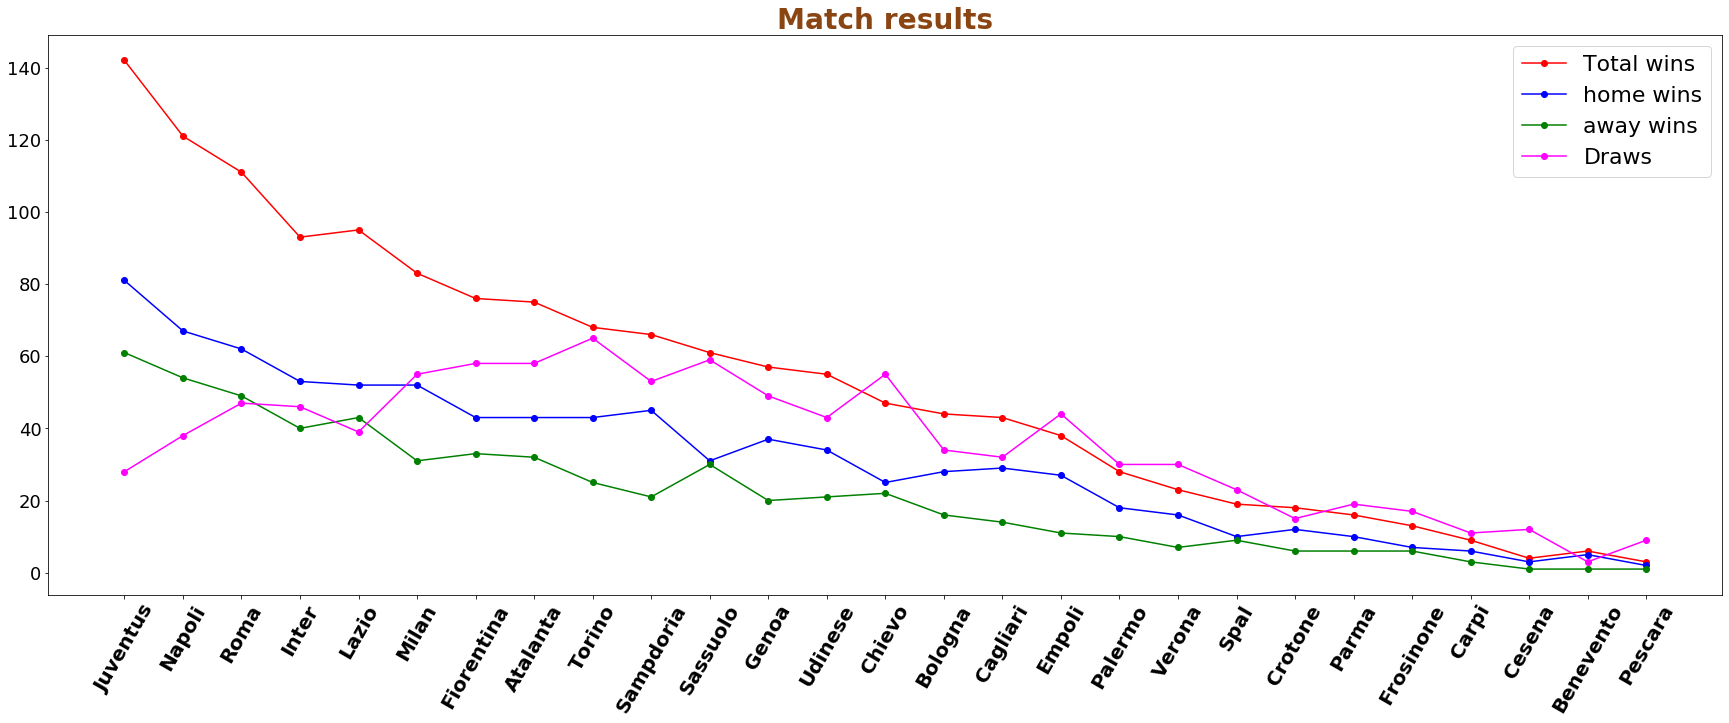

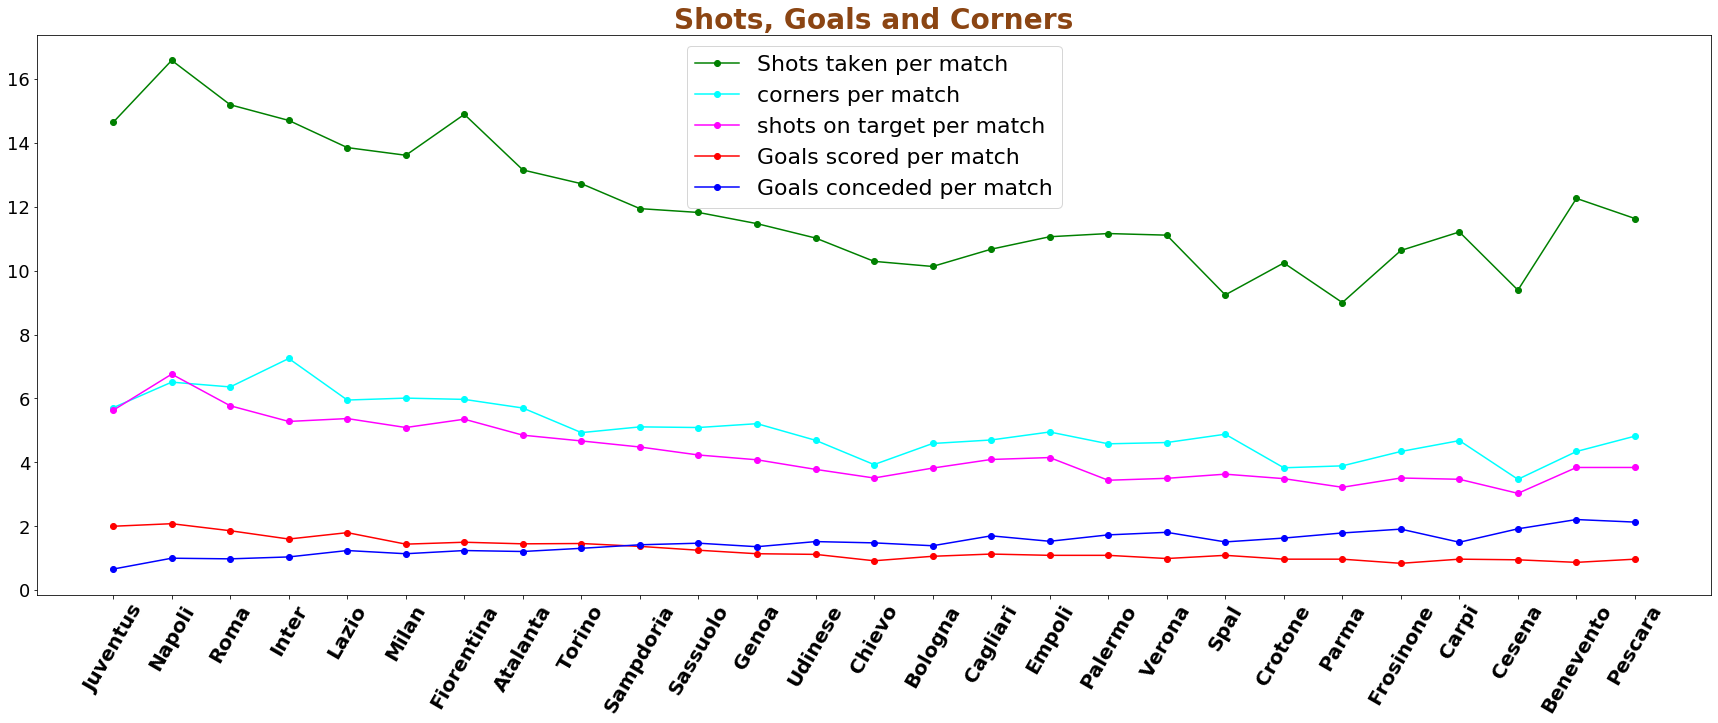

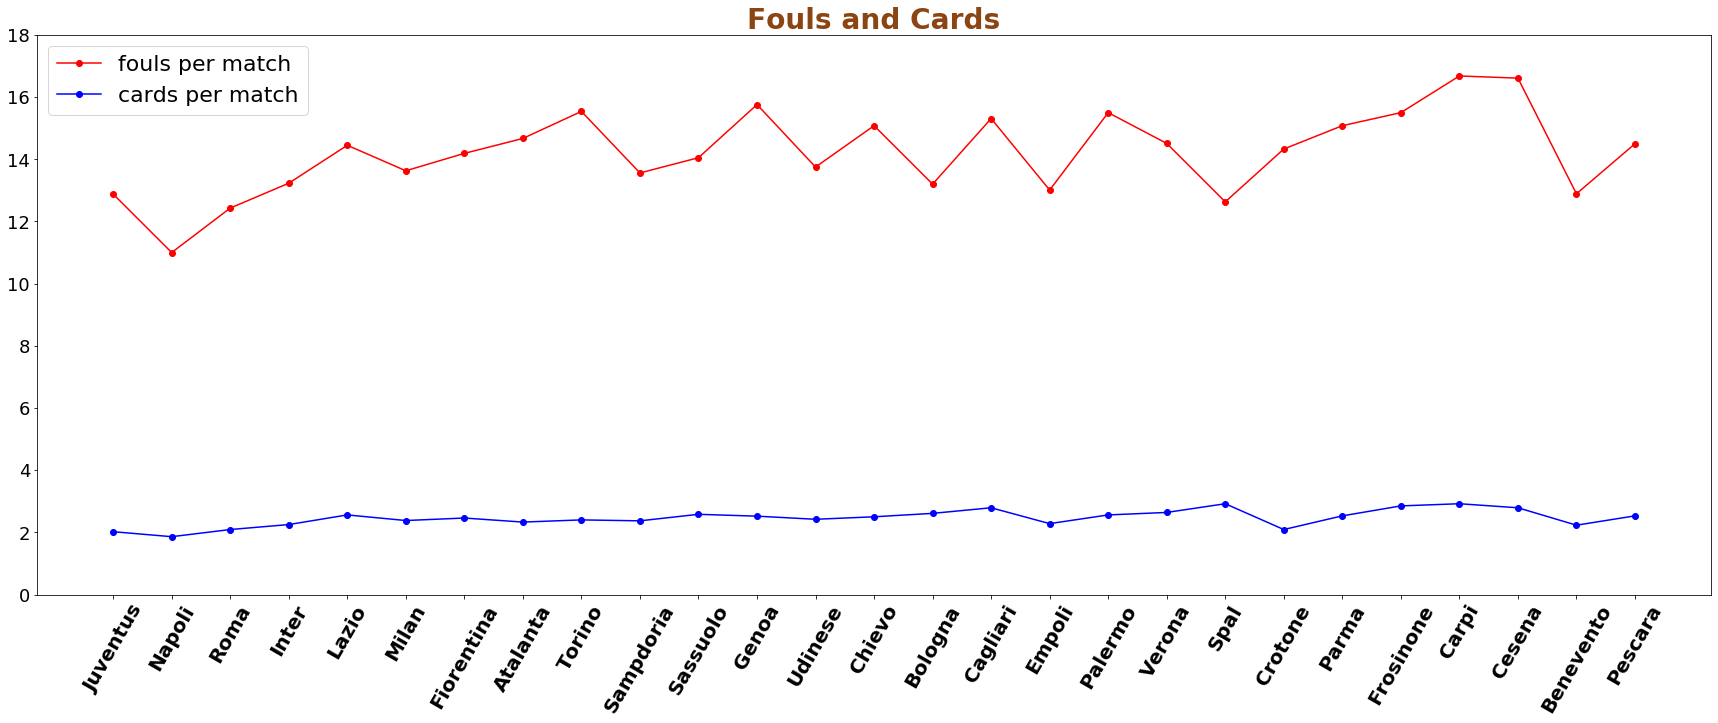

In [35]:
plt.figure(figsize = (30,35))
plt.subplot(311)
plt.plot(points_table_seriea.index,points_table_seriea['Total_wins'],marker = 'o',color = 'red',label = 'Total wins')
plt.plot(points_table_seriea.index,points_table_seriea['home_wins'],marker = 'o',color = 'blue',label = 'home wins')
plt.plot(points_table_seriea.index,points_table_seriea['away_wins'],marker = 'o',color = 'green',label = 'away wins')
plt.plot(points_table_seriea.index,points_table_seriea['Draws'],marker = 'o',color = 'magenta',label = 'Draws')
plt.xticks(points_table_seriea.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,160,20),fontsize = 18)
plt.title('Match results',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(312)
plt.plot(points_table_seriea.index,points_table_seriea['shot_taken_per_match'],marker = 'o',color = 'green',label = 'Shots taken per match')
plt.plot(points_table_seriea.index,points_table_seriea['corners_per_match'],marker = 'o',color = 'cyan',label = 'corners per match')
plt.plot(points_table_seriea.index,points_table_seriea['shot_on_target_per_match'],marker = 'o',color = 'magenta',label = 'shots on target per match')
plt.plot(points_table_seriea.index,points_table_seriea['goals_scored_per_match'],marker = 'o',color = 'red',label = 'Goals scored per match')
plt.plot(points_table_seriea.index,points_table_seriea['goals_conceded_per_match'],marker = 'o',color =  'blue',label = 'Goals conceded per match')
plt.xticks(points_table_seriea.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 18)
plt.title('Shots, Goals and Corners',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(313)
plt.plot(points_table_seriea.index,points_table_seriea['fouls_per_match'],marker = 'o',color = 'red',label = 'fouls per match')
plt.plot(points_table_seriea.index,points_table_seriea['yellow_cards_per_match'] + points_table_seriea['red_cards_per_match'],marker = 'o',color = 'blue',label = 'cards per match')
plt.xticks(points_table_seriea.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,20,2),fontsize = 18)
plt.title('Fouls and Cards',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.show()

- We can see a clear dominance of juventus over the last 5 years
- Here also we can there are 3 teams which have performed a lot better than the others
- We can see napoli has been the most attacking team in the league and juventus has the defence in the league.


### Big 6 Comparision

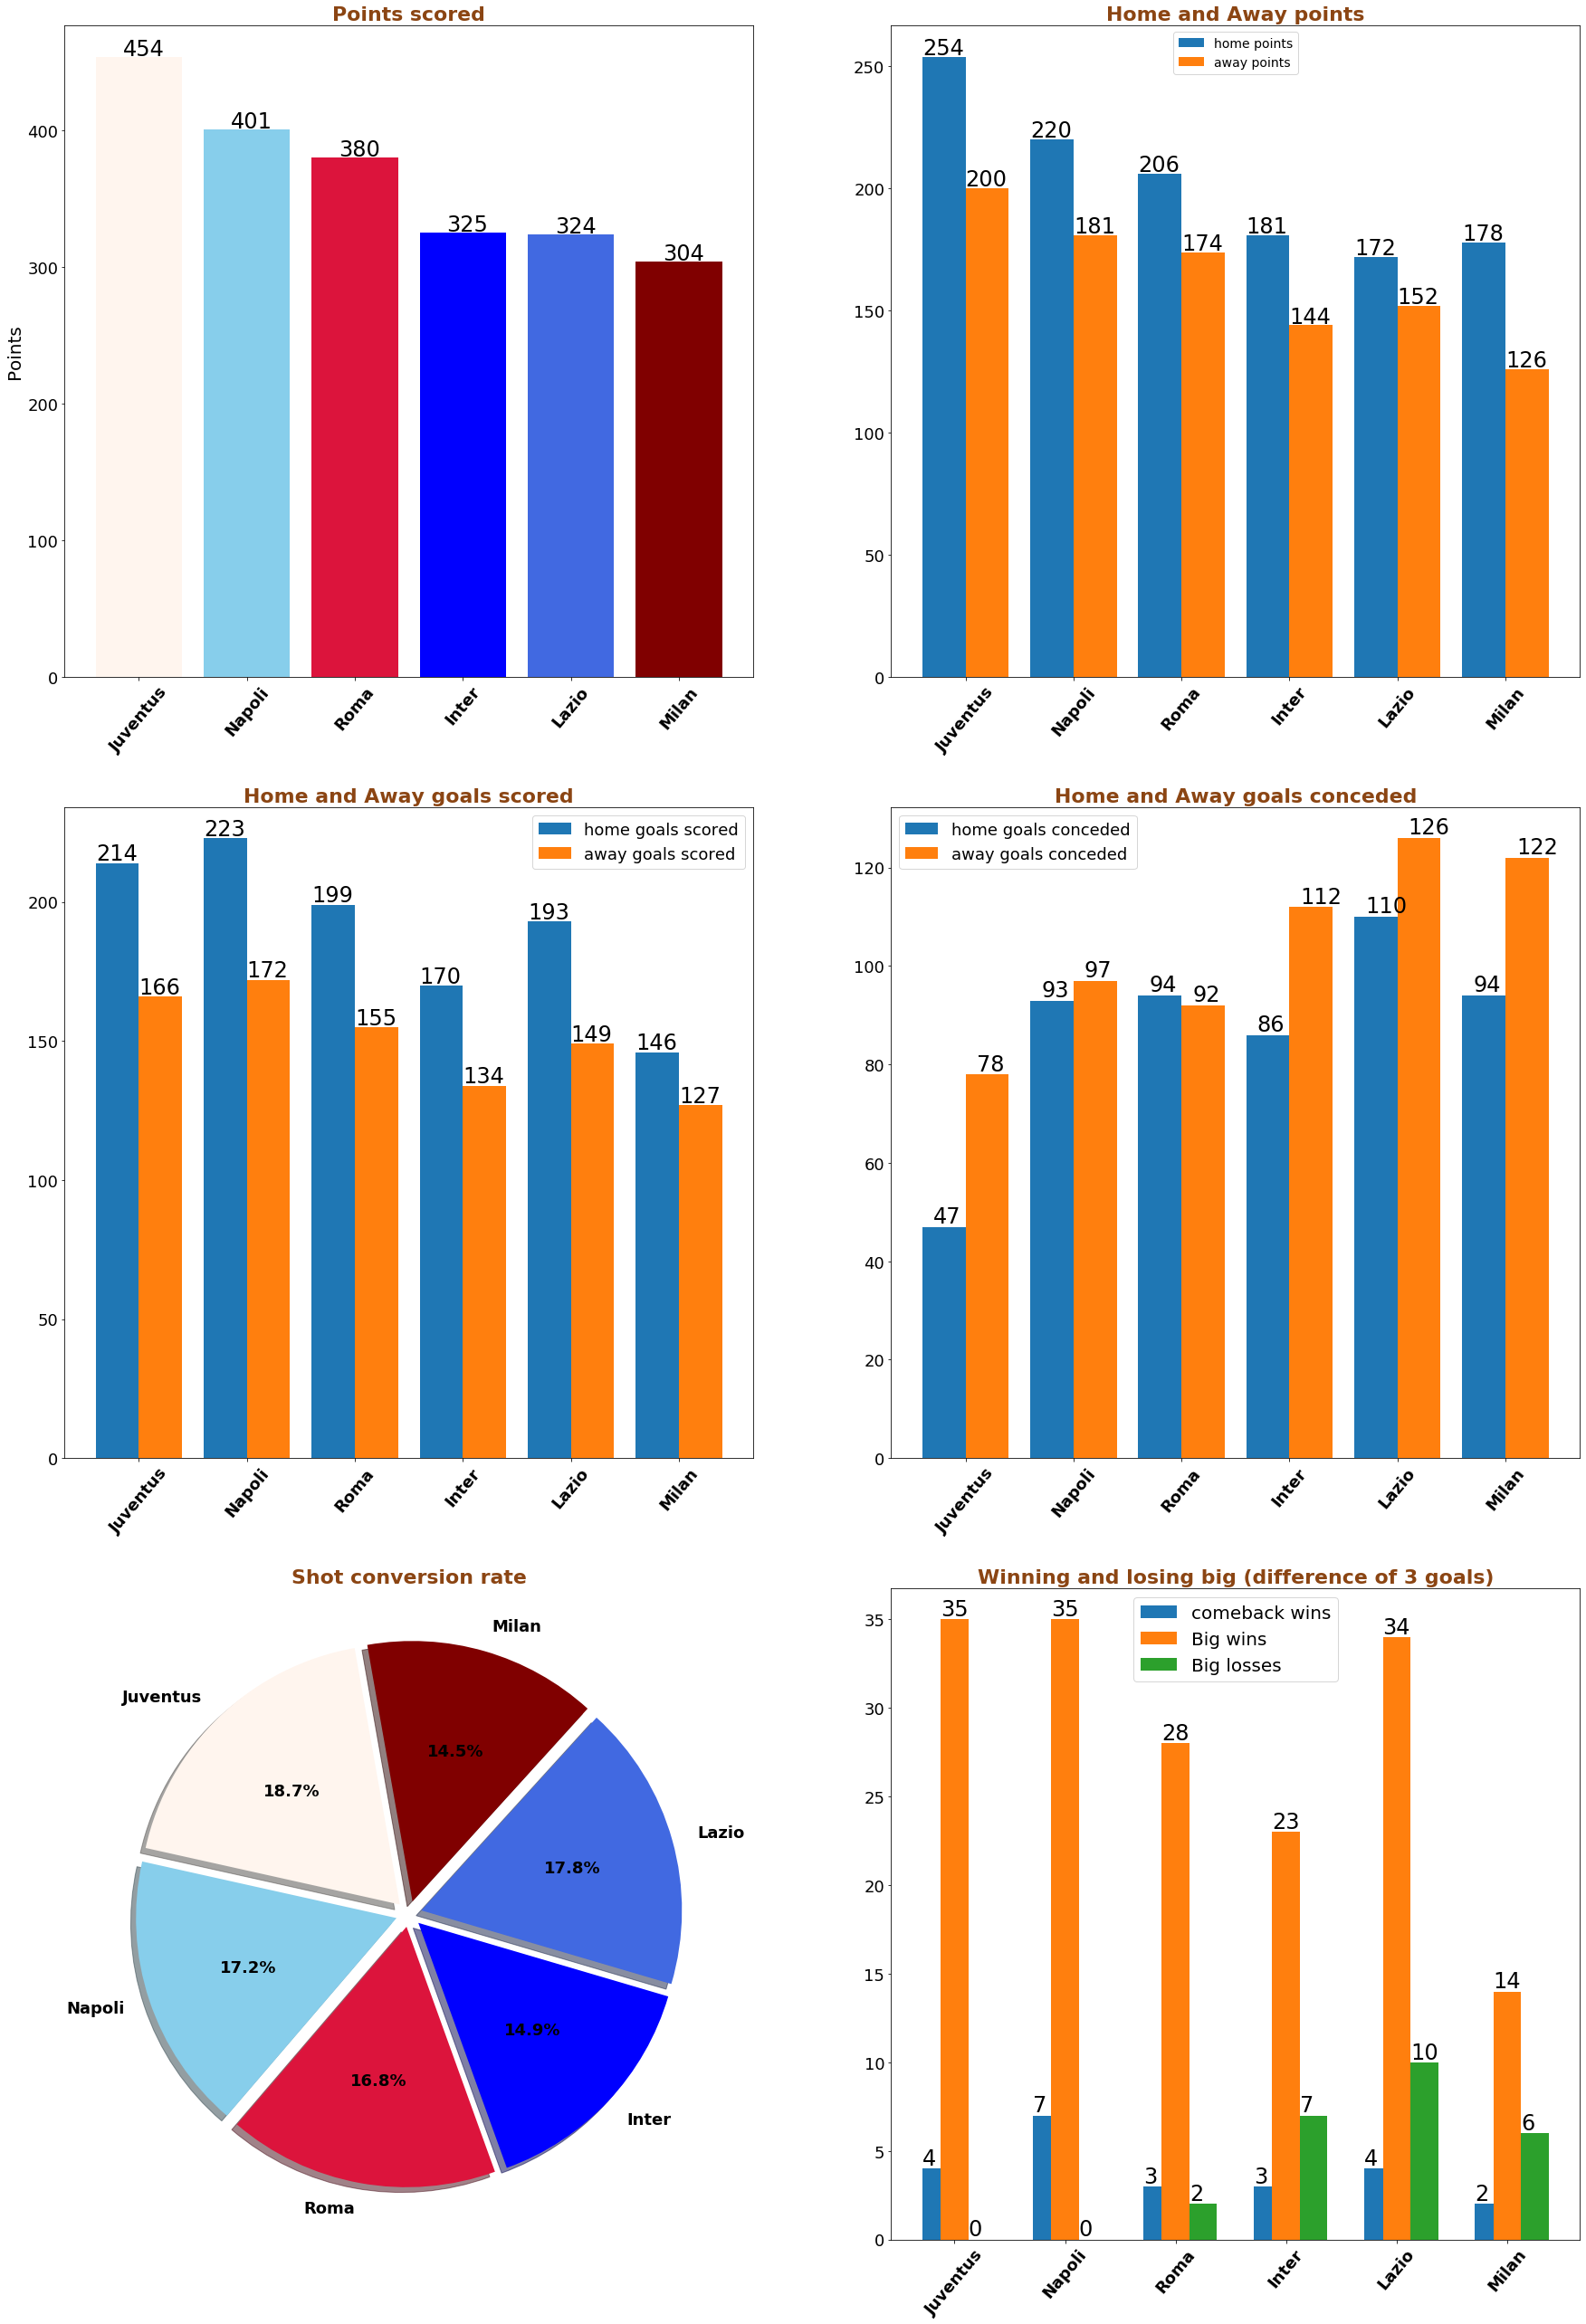

In [36]:
Big_6_seriea = points_table_seriea[:6]

fig,ax = plt.subplots(3,2,figsize = (30,45))
ax[0,0].bar(Big_6_seriea.index,Big_6_seriea['Total_points_won'],color = ['seashell','skyblue','crimson','blue','royalblue','maroon'])
ax[0,0].set_ylabel('Points',fontsize = 20)
ax[0,0].set_yticklabels(range(0,500,100),fontsize = 18)
ax[0,0].set_xticklabels(Big_6_seriea.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,0].set_title('Points scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x()+0.25,i.get_height()+1.2,str(i.get_height()),fontsize = 24)

    
x = np.arange(len(Big_6_seriea.index))
w = 0.40
ax[0,1].bar(x - w/2,Big_6_seriea['home_points'],w,label = 'home points')
ax[0,1].bar(x + w/2,Big_6_seriea['away_points'],w,label = 'away points')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(Big_6_seriea.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,1].set_yticklabels(range(0,300,50),fontsize = 18)
ax[0,1].legend(loc = 'upper center',fontsize = 14)
ax[0,1].set_title('Home and Away points',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)


ax[1,0].bar(x-w/2,Big_6_seriea['home_goals_scored'],w,label = 'home goals scored')
ax[1,0].bar(x+w/2,Big_6_seriea['away_goals_scored'],w,label = 'away goals scored')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(Big_6_seriea.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,0].set_yticklabels(range(0,300,50),fontsize = 18)
ax[1,0].legend(fontsize = 18)
ax[1,0].set_title('Home and Away goals scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)

    
ax[1,1].bar(x-w/2,Big_6_seriea['home_goals_conceded'],w,label = 'home goals conceded')
ax[1,1].bar(x+w/2,Big_6_seriea['away_goals_conceded'],w,label = 'away goals conceded')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(Big_6_seriea.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,1].set_yticklabels(range(0,160,20),fontsize = 18)
ax[1,1].legend(fontsize = 18)
ax[1,1].set_title('Home and Away goals conceded',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x()+0.1,i.get_height()+0.8,str(i.get_height()),fontsize = 24)

ax[2,0].pie(100 * Big_6_seriea['goals_scored_per_match']/Big_6_seriea['shot_taken_per_match'],autopct = '%1.1f%%',startangle = 100,labels = Big_6_seriea.index,shadow = True,explode = (0.05,0.05,0.05,0.05,0.05,0.05),colors = ('seashell','skyblue','crimson','blue','royalblue','maroon'),textprops = {'fontsize':18, 'fontweight':'bold'})
ax[2,0].set_title('Shot conversion rate',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')

w = 0.25
ax[2,1].bar(x-2*w/3,Big_6_seriea['comeback_wins'],w,label = 'comeback wins')
ax[2,1].bar(x,Big_6_seriea['Big_wins'],w,label = 'Big wins')
ax[2,1].bar(x+w,Big_6_seriea['Big_loss'],w,label = 'Big losses')
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(Big_6_seriea.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[2,1].set_yticklabels(range(0,40,5),fontsize = 18)
ax[2,1].legend(fontsize = 20)
ax[2,1].set_title('Winning and losing big (difference of 3 goals)',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[2,1].patches:
    ax[2,1].text(i.get_x(),i.get_height()+0.2,str(i.get_height()),fontsize = 24)

plt.show()

- We can see juventus has dominated the league by a big margin over the 5 years.
- juventus has a great defensive record almost equivalent to that of atletico in spain.
- Napoli's attacking stats are impressive
